#### Imports

In [1]:
# %pip install --force-reinstall airavata-python-sdk[notebook]
import airavata_jupyter_magic

%authenticate
%request_runtime cpu --file=cybershuttle.yml
%switch_runtime cpu

⠼ Authenticate via link: ]8;id=825699;https://auth.cybershuttle.org/realms/default/device?user_code=AORR-PKUX\https://auth.cybershuttle.org/realms/default/device?user_code=AORR-PKUX]8;;\ (1)

Authenticated.

Requesting runtime=cpu
cpuCount: 4
experimentName: CS_Agent
group: Cerebrum
libraries:
- python=3.10
- pip
- numpy
- pytorch::pytorch
- pandas
- matplotlib
- holoviews
- seaborn
- tqdm
- scipy
- scikit-learn
memory: 4096
mounts:
- ~/cybershuttle/dataset/hchoilab-biologicalRNNs/celltype-data:/data/celltype-data
- ~/cybershuttle/dataset/hchoilab-biologicalRNNs/celltype-data:/data/celltype-data
nodeCount: 1
pip: null
queue: shared
remoteCluster: Anvil
wallTime: 60

Requested runtime=cpu. state=CREATED
Switched to runtime=cpu.


In [ ]:
%pip install torch
# %restart_runtime cpu

In [11]:
%switch_runtime local
%restart_runtime cpu
%switch_runtime cpu

Switched to runtime=local.
Restarted kernel=base on runtime=cpu
Switched to runtime=cpu.


In [11]:
%ls /data

⠸ Connecting to=cpu... status=READY
celltype-data/


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm

from tqdm import tqdm
import os

⠸ Connecting to=cpu... status=READY


In [11]:
from numpy.linalg import eig, svd
from sklearn.decomposition import PCA
from scipy.stats import levene, ttest_ind

⠸ Connecting to=cpu... status=READY


In [11]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset

from torch.optim.lr_scheduler import StepLR, CosineAnnealingLR

⠸ Connecting to=cpu... status=READY


#### Load paths
Make edits as needed!

In [11]:
import numpy as np
from numpy.linalg import norm, eigvals
from numpy.random import choice, random_sample, normal

import copy

from math import factorial
from itertools import permutations

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset

###################################################################################################
###################################################################################################

"""
Create PyTorch dataloaders using numpy data tuples

Parameters:  dataTuple = All information that is to be processed through the dataloader: tuple
             bsize = Batch size: int
             shuffle = Whether or not the data are to be shuffled by the loader: bool

Returns:     loader = Python iterable over the dataset: DataLoader

"""

def makeTensorLoaders(dataTuple,bsize,shuffle):
    ll = len(dataTuple)
    dataTuple = list(dataTuple)

    for ii in range(ll):
        if dataTuple[ii].dtype == 'float64':
            dataTuple[ii] = Variable(torch.from_numpy(dataTuple[ii])).requires_grad_(True)
        else:
            dataTuple[ii] = Variable(torch.from_numpy(dataTuple[ii])).requires_grad_(False)

    dataTuple = tuple(dataTuple)

    tensorData = TensorDataset(*dataTuple)
    loader = DataLoader(tensorData, batch_size=bsize, shuffle=shuffle)

    return loader

###################################################################################################
###################################################################################################


⠸ Connecting to=cpu... status=READY


#### Test for CUDA

In [11]:
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('No GPU, training on CPU')
    device = torch.device('cpu')
else:
    print('GPU found, training on GPU')
    device = torch.device('cuda')

⠸ Connecting to=cpu... status=READY
No GPU, training on CPU


#### Model related hyper-params

In [11]:
nRuns = 1

⠸ Connecting to=cpu... status=READY


In [11]:
batch_size = 200 ##100

⠸ Connecting to=cpu... status=READY


In [11]:
latent_scaling = 16
pop_list_types = [12,2,1]

⠸ Connecting to=cpu... status=READY


In [11]:
n_areas = 2
n_depths = 3

## Number of recurrent neurons in total
N = int(n_areas*n_depths*np.sum(pop_list_types)*latent_scaling)

⠸ Connecting to=cpu... status=READY


#### Data loading for runs

In [11]:
default_path = '/data/celltype-data/'

suffix = 'familiar_change'

⠸ Connecting to=cpu... status=READY


#### Note on nomenclature!
Train is input data and test is output data

In [11]:
# Loading fitting data
dff_V1_L4_sst_train = np.load(default_path + 'dff_V1_L4_sst_' + suffix + '_train.npy')
dff_V1_L23_sst_train = np.load(default_path +'dff_V1_L23_sst_' + suffix + '_train.npy')
dff_V1_L5_sst_train = np.load(default_path +'dff_V1_L5_sst_' + suffix + '_train.npy')

dff_V1_L4_vip_train = np.load(default_path +'dff_V1_L4_vip_' + suffix + '_train.npy')
dff_V1_L23_vip_train = np.load(default_path +'dff_V1_L23_vip_' + suffix + '_train.npy')
dff_V1_L5_vip_train = np.load(default_path +'dff_V1_L5_vip_' + suffix + '_train.npy')

dff_V1_L4_pyr_train = np.load(default_path +'dff_V1_L4_pyr_' + suffix + '_train.npy')
dff_V1_L23_pyr_train = np.load(default_path +'dff_V1_L23_pyr_' + suffix + '_train.npy')
dff_V1_L5_pyr_train = np.load(default_path +'dff_V1_L5_pyr_' + suffix + '_train.npy')

dff_LM_L4_sst_train = np.load(default_path +'dff_LM_L4_sst_' + suffix + '_train.npy')
dff_LM_L23_sst_train = np.load(default_path +'dff_LM_L23_sst_' + suffix + '_train.npy')
dff_LM_L5_sst_train = np.load(default_path +'dff_LM_L5_sst_' + suffix + '_train.npy')

dff_LM_L4_vip_train = np.load(default_path +'dff_LM_L4_vip_' + suffix + '_train.npy')
dff_LM_L23_vip_train = np.load(default_path +'dff_LM_L23_vip_' + suffix + '_train.npy')
dff_LM_L5_vip_train = np.load(default_path +'dff_LM_L5_vip_' + suffix + '_train.npy')

dff_LM_L4_pyr_train = np.load(default_path +'dff_LM_L4_pyr_' + suffix + '_train.npy')
dff_LM_L23_pyr_train = np.load(default_path +'dff_LM_L23_pyr_' + suffix + '_train.npy')
dff_LM_L5_pyr_train = np.load(default_path +'dff_LM_L5_pyr_' + suffix + '_train.npy')

# Loading predictive data
dff_V1_L4_pyr_test = np.load(default_path +'dff_V1_L4_pyr_' + suffix + '_test.npy')
dff_V1_L23_pyr_test = np.load(default_path +'dff_V1_L23_pyr_' + suffix + '_test.npy')
dff_V1_L5_pyr_test = np.load(default_path +'dff_V1_L5_pyr_' + suffix + '_test.npy')

dff_V1_L4_sst_test = np.load(default_path +'dff_V1_L4_sst_' + suffix + '_test.npy')
dff_V1_L23_sst_test = np.load(default_path +'dff_V1_L23_sst_' + suffix + '_test.npy')
dff_V1_L5_sst_test = np.load(default_path +'dff_V1_L5_sst_' + suffix + '_test.npy')

dff_V1_L4_vip_test = np.load(default_path +'dff_V1_L4_vip_' + suffix + '_test.npy')
dff_V1_L23_vip_test = np.load(default_path +'dff_V1_L23_vip_' + suffix + '_test.npy')
dff_V1_L5_vip_test = np.load(default_path +'dff_V1_L5_vip_' + suffix + '_test.npy')

dff_LM_L4_pyr_test = np.load(default_path +'dff_LM_L4_pyr_' + suffix + '_test.npy')
dff_LM_L23_pyr_test = np.load(default_path +'dff_LM_L23_pyr_' + suffix + '_test.npy')
dff_LM_L5_pyr_test = np.load(default_path +'dff_LM_L5_pyr_' + suffix + '_test.npy')

dff_LM_L4_sst_test = np.load(default_path +'dff_LM_L4_sst_' + suffix + '_test.npy')
dff_LM_L23_sst_test = np.load(default_path +'dff_LM_L23_sst_' + suffix + '_test.npy')
dff_LM_L5_sst_test = np.load(default_path +'dff_LM_L5_sst_' + suffix + '_test.npy')

dff_LM_L4_vip_test = np.load(default_path +'dff_LM_L4_vip_' + suffix + '_test.npy')
dff_LM_L23_vip_test = np.load(default_path +'dff_LM_L23_vip_' + suffix + '_test.npy')
dff_LM_L5_vip_test = np.load(default_path +'dff_LM_L5_vip_' + suffix + '_test.npy')

⠸ Connecting to=cpu... status=READY


In [11]:
stacked_train_set = np.dstack((dff_V1_L4_pyr_train, dff_V1_L4_sst_train, dff_V1_L4_vip_train,
                               dff_V1_L23_pyr_train, dff_V1_L23_sst_train, dff_V1_L23_vip_train,
                               dff_V1_L5_pyr_train, dff_V1_L5_sst_train, dff_V1_L5_vip_train,
                               dff_LM_L4_pyr_train, dff_LM_L4_sst_train, dff_LM_L4_vip_train,
                               dff_LM_L23_pyr_train, dff_LM_L23_sst_train, dff_LM_L23_vip_train,
                               dff_LM_L5_pyr_train, dff_LM_L5_sst_train, dff_LM_L5_vip_train))

⠸ Connecting to=cpu... status=READY


In [11]:
stacked_test_set = np.dstack((dff_V1_L4_pyr_test, dff_V1_L4_sst_test, dff_V1_L4_vip_test,
                               dff_V1_L23_pyr_test, dff_V1_L23_sst_test, dff_V1_L23_vip_test,
                               dff_V1_L5_pyr_test, dff_V1_L5_sst_test, dff_V1_L5_vip_test,
                               dff_LM_L4_pyr_test, dff_LM_L4_sst_test, dff_LM_L4_vip_test,
                               dff_LM_L23_pyr_test, dff_LM_L23_sst_test, dff_LM_L23_vip_test,
                               dff_LM_L5_pyr_test, dff_LM_L5_sst_test, dff_LM_L5_vip_test))

⠸ Connecting to=cpu... status=READY


⠸ Connecting to=cpu... status=READY


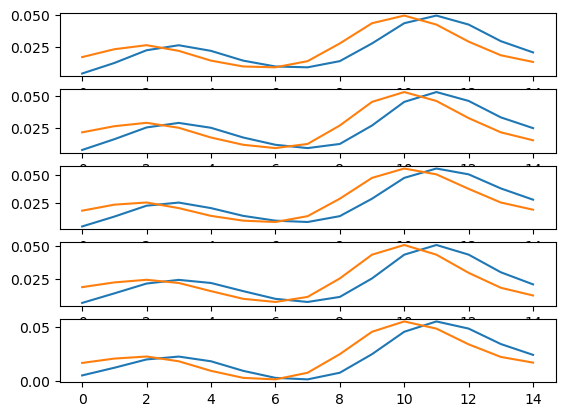

In [11]:
for ii, idxs in enumerate(range(25,30)):
    plt.subplot(5,1,ii+1)
    plt.plot(dff_V1_L4_pyr_train[idxs])
    plt.plot(dff_V1_L4_pyr_test[idxs])

#### Directory init

In [11]:
pp = 'Familiar-Change-Sparse-Frozen/'

⠸ Connecting to=cpu... status=READY


In [11]:
npp = {}
pp_npy = {}
pp_pts = {}

⠸ Connecting to=cpu... status=READY


In [11]:
for cntr in range(nRuns):

    npp[cntr] = 'celltype-dale-pruning-latent-16-'+str(cntr)+'/'
    pp_npy[cntr] = pp+npp[cntr]+'npys-'+str(cntr)+'/'
    pp_pts[cntr] = pp+npp[cntr]+'pts-'+str(cntr)+'/'

    os.makedirs(npp[cntr], exist_ok=True)
    os.makedirs(pp_npy[cntr], exist_ok=True)
    os.makedirs(pp_pts[cntr], exist_ok=True)

    os.makedirs(os.path.join(pp,npp[cntr],pp_npy[cntr],'Dataset/'), exist_ok=True)

⠸ Connecting to=cpu... status=READY


#### Seeds

In [11]:
seeds = np.random.randint(1000, size=nRuns)
np.save(pp_npy[cntr]+'seeds',seeds)

⠸ Connecting to=cpu... status=READY


#### Block indices

In [11]:
label_arr = ['V1_L4_pyr','V1_L4_sst','V1_L4_vip',
             'V1_L23_pyr','V1_L23_sst','V1_L23_vip',
             'V1_L5_pyr','V1_L5_sst','V1_L5_vip',
             'LM_L4_pyr','LM_L4_sst','LM_L4_vip',
             'LM_L23_pyr','LM_L23_sst','LM_L23_vip',
             'LM_L5_pyr','LM_L5_sst','LM_L5_vip']

⠸ Connecting to=cpu... status=READY


In [11]:
n_cell_types = len(label_arr)

⠸ Connecting to=cpu... status=READY


In [11]:
start_V1_L4_Pyr = 0
end_V1_L4_Pyr = start_V1_L4_Pyr + pop_list_types[0]*latent_scaling

start_V1_L4_SST = end_V1_L4_Pyr
end_V1_L4_SST = start_V1_L4_SST + pop_list_types[1]*latent_scaling

start_V1_L4_VIP = end_V1_L4_SST
end_V1_L4_VIP = start_V1_L4_VIP + pop_list_types[2]*latent_scaling

## V1, L2/3
start_V1_L23_Pyr = end_V1_L4_VIP
end_V1_L23_Pyr = start_V1_L23_Pyr + pop_list_types[0]*latent_scaling

start_V1_L23_SST = end_V1_L23_Pyr
end_V1_L23_SST = start_V1_L23_SST + pop_list_types[1]*latent_scaling

start_V1_L23_VIP = end_V1_L23_SST
end_V1_L23_VIP = start_V1_L23_VIP + pop_list_types[2]*latent_scaling

## V1, L5
start_V1_L5_Pyr = end_V1_L23_VIP
end_V1_L5_Pyr = start_V1_L5_Pyr + pop_list_types[0]*latent_scaling

start_V1_L5_SST = end_V1_L5_Pyr
end_V1_L5_SST = start_V1_L5_SST + pop_list_types[1]*latent_scaling

start_V1_L5_VIP = end_V1_L5_SST
end_V1_L5_VIP = start_V1_L5_VIP + pop_list_types[2]*latent_scaling

## LM, L4
start_LM_L4_Pyr = end_V1_L5_VIP ## would need to be changed if using L6 populations as well
end_LM_L4_Pyr = start_LM_L4_Pyr + pop_list_types[0]*latent_scaling

start_LM_L4_SST = end_LM_L4_Pyr
end_LM_L4_SST = start_LM_L4_SST + pop_list_types[1]*latent_scaling

start_LM_L4_VIP = end_LM_L4_SST
end_LM_L4_VIP = start_LM_L4_VIP + pop_list_types[2]*latent_scaling

## LM, L2/3
start_LM_L23_Pyr = end_LM_L4_VIP
end_LM_L23_Pyr = start_LM_L23_Pyr + pop_list_types[0]*latent_scaling

start_LM_L23_SST = end_LM_L23_Pyr
end_LM_L23_SST = start_LM_L23_SST + pop_list_types[1]*latent_scaling

start_LM_L23_VIP = end_LM_L23_SST
end_LM_L23_VIP = start_LM_L23_VIP + pop_list_types[2]*latent_scaling

## LM, L5
start_LM_L5_Pyr = end_LM_L23_VIP
end_LM_L5_Pyr = start_LM_L5_Pyr + pop_list_types[0]*latent_scaling

start_LM_L5_SST = end_LM_L5_Pyr
end_LM_L5_SST = start_LM_L5_SST + pop_list_types[1]*latent_scaling

start_LM_L5_VIP = end_LM_L5_SST
end_LM_L5_VIP = start_LM_L5_VIP + pop_list_types[2]*latent_scaling

⠸ Connecting to=cpu... status=READY


#### Architecture

In [11]:
# Define the neural network
class CelltypeRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, device):

        super(CelltypeRNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, num_layers=1, batch_first=True, nonlinearity='tanh', bias=False)

        self.fc1 = nn.Linear(round(pop_list_types[0]*latent_scaling), num_classes)
        self.fc2 = nn.Linear(round(pop_list_types[1]*latent_scaling), num_classes)
        self.fc3 = nn.Linear(round(pop_list_types[2]*latent_scaling), num_classes)
        self.fc4 = nn.Linear(round(pop_list_types[0]*latent_scaling), num_classes)
        self.fc5 = nn.Linear(round(pop_list_types[1]*latent_scaling), num_classes)
        self.fc6 = nn.Linear(round(pop_list_types[2]*latent_scaling), num_classes)
        self.fc7 = nn.Linear(round(pop_list_types[0]*latent_scaling), num_classes)
        self.fc8 = nn.Linear(round(pop_list_types[1]*latent_scaling), num_classes)
        self.fc9 = nn.Linear(round(pop_list_types[2]*latent_scaling), num_classes)

        self.fc10 = nn.Linear(round(pop_list_types[0]*latent_scaling), num_classes)
        self.fc11 = nn.Linear(round(pop_list_types[1]*latent_scaling), num_classes)
        self.fc12 = nn.Linear(round(pop_list_types[2]*latent_scaling), num_classes)
        self.fc13 = nn.Linear(round(pop_list_types[0]*latent_scaling), num_classes)
        self.fc14 = nn.Linear(round(pop_list_types[1]*latent_scaling), num_classes)
        self.fc15 = nn.Linear(round(pop_list_types[2]*latent_scaling), num_classes)
        self.fc16 = nn.Linear(round(pop_list_types[0]*latent_scaling), num_classes)
        self.fc17 = nn.Linear(round(pop_list_types[1]*latent_scaling), num_classes)
        self.fc18 = nn.Linear(round(pop_list_types[2]*latent_scaling), num_classes)

        self.fc1.weight.requires_grad = False
        self.fc1.bias.requires_grad = False

        self.fc2.weight.requires_grad = False
        self.fc2.bias.requires_grad = False

        self.fc3.weight.requires_grad = False
        self.fc3.bias.requires_grad = False

        self.fc4.weight.requires_grad = False
        self.fc4.bias.requires_grad = False

        self.fc5.weight.requires_grad = False
        self.fc5.bias.requires_grad = False

        self.fc6.weight.requires_grad = False
        self.fc6.bias.requires_grad = False

        self.fc7.weight.requires_grad = False
        self.fc7.bias.requires_grad = False

        self.fc8.weight.requires_grad = False
        self.fc8.bias.requires_grad = False

        self.fc9.weight.requires_grad = False
        self.fc9.bias.requires_grad = False

        self.fc10.weight.requires_grad = False
        self.fc10.bias.requires_grad = False

        self.fc11.weight.requires_grad = False
        self.fc11.bias.requires_grad = False

        self.fc12.weight.requires_grad = False
        self.fc12.bias.requires_grad = False

        self.fc13.weight.requires_grad = False
        self.fc13.bias.requires_grad = False

        self.fc14.weight.requires_grad = False
        self.fc14.bias.requires_grad = False

        self.fc15.weight.requires_grad = False
        self.fc15.bias.requires_grad = False

        self.fc16.weight.requires_grad = False
        self.fc16.bias.requires_grad = False

        self.fc17.weight.requires_grad = False
        self.fc17.bias.requires_grad = False

        self.fc18.weight.requires_grad = False
        self.fc18.bias.requires_grad = False

        self.n_classes = num_classes
        self.device = device

    def forward(self, x):
        ## Define input mask
        in_mask = torch.zeros(self.hidden_size, self.input_size).to(device)
        in_mask[start_V1_L4_Pyr:end_V1_L4_Pyr,0] = 1
        in_mask[start_V1_L4_SST:end_V1_L4_SST,1] = 1
        in_mask[start_V1_L4_VIP:end_V1_L4_VIP,2] = 1

        in_mask[start_V1_L23_Pyr:end_V1_L23_Pyr,3] = 1
        in_mask[start_V1_L23_SST:end_V1_L23_SST,4] = 1
        in_mask[start_V1_L23_VIP:end_V1_L23_VIP,5] = 1

        in_mask[start_V1_L5_Pyr:end_V1_L5_Pyr,6] = 1
        in_mask[start_V1_L5_SST:end_V1_L5_SST,7] = 1
        in_mask[start_V1_L5_VIP:end_V1_L5_VIP,8] = 1

        in_mask[start_LM_L4_Pyr:end_LM_L4_Pyr,9] = 1
        in_mask[start_LM_L4_SST:end_LM_L4_SST,10] = 1
        in_mask[start_LM_L4_VIP:end_LM_L4_VIP,11] = 1

        in_mask[start_LM_L23_Pyr:end_LM_L23_Pyr,12] = 1
        in_mask[start_LM_L23_SST:end_LM_L23_SST,13] = 1
        in_mask[start_LM_L23_VIP:end_LM_L23_VIP,14] = 1

        in_mask[start_LM_L5_Pyr:end_LM_L5_Pyr,15] = 1
        in_mask[start_LM_L5_SST:end_LM_L5_SST,16] = 1
        in_mask[start_LM_L5_VIP:end_LM_L5_VIP,17] = 1

        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        nSamp, inDim, nSteps = x.shape

        ops = torch.zeros(nSamp,nSteps,self.hidden_size, requires_grad=False).to(self.device)

        pred1 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)
        pred2 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)
        pred3 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)
        pred4 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)
        pred5 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)
        pred6 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)
        pred7 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)
        pred8 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)
        pred9 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)

        pred10 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)
        pred11 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)
        pred12 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)
        pred13 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)
        pred14 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)
        pred15 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)
        pred16 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)
        pred17 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)
        pred18 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)

        for ii in range(nSteps):
            ## Apply input mask
            self.rnn.weight_ih_l0.data.mul(in_mask)

            ip = torch.unsqueeze(x[:,:,ii],-1).view(nSamp,1,inDim)
            op, ht = self.rnn(ip,h0) ## pass 1 timestep through RNN
            fr_mask = ht.clone()>0
            htt = fr_mask*ht.clone() ## mask firing rate
            h0 = htt ## update hidden state
            ops[:,ii,:] = torch.squeeze(op.clone())

            ## Final prediction at every timestep
            pred1[:,ii,:] = self.fc1(ops[:, ii, start_V1_L4_Pyr:end_V1_L4_Pyr].clone())
            pred2[:,ii,:] = self.fc2(ops[:, ii, start_V1_L4_SST:end_V1_L4_SST].clone())
            pred3[:,ii,:] = self.fc3(ops[:, ii, start_V1_L4_VIP:end_V1_L4_VIP].clone())
            pred4[:,ii,:] = self.fc4(ops[:, ii, start_V1_L23_Pyr:end_V1_L23_Pyr].clone())
            pred5[:,ii,:] = self.fc5(ops[:, ii, start_V1_L23_SST:end_V1_L23_SST].clone())
            pred6[:,ii,:] = self.fc6(ops[:, ii, start_V1_L23_VIP:end_V1_L23_VIP].clone())
            pred7[:,ii,:] = self.fc7(ops[:, ii, start_V1_L5_Pyr:end_V1_L5_Pyr].clone())
            pred8[:,ii,:] = self.fc8(ops[:, ii, start_V1_L5_SST:end_V1_L5_SST].clone())
            pred9[:,ii,:] = self.fc9(ops[:, ii, start_V1_L5_VIP:end_V1_L5_VIP].clone())

            pred10[:,ii,:] = self.fc10(ops[:, ii, start_LM_L4_Pyr:end_LM_L4_Pyr].clone())
            pred11[:,ii,:] = self.fc11(ops[:, ii, start_LM_L4_SST:end_LM_L4_SST].clone())
            pred12[:,ii,:] = self.fc12(ops[:, ii, start_LM_L4_VIP:end_LM_L4_VIP].clone())
            pred13[:,ii,:] = self.fc13(ops[:, ii, start_LM_L23_Pyr:end_LM_L23_Pyr].clone())
            pred14[:,ii,:] = self.fc14(ops[:, ii, start_LM_L23_SST:end_LM_L23_SST].clone())
            pred15[:,ii,:] = self.fc15(ops[:, ii, start_LM_L23_VIP:end_LM_L23_VIP].clone())
            pred16[:,ii,:] = self.fc16(ops[:, ii, start_LM_L5_Pyr:end_LM_L5_Pyr].clone())
            pred17[:,ii,:] = self.fc17(ops[:, ii, start_LM_L5_SST:end_LM_L5_SST].clone())
            pred18[:,ii,:] = self.fc18(ops[:, ii, start_LM_L5_VIP:end_LM_L5_VIP].clone())

        out1 = pred1.clone() #Take the output from the last time step
        out2 = pred2.clone() #Take the output from the last time step
        out3 = pred3.clone() #Take the output from the last time step
        out4 = pred4.clone() #Take the output from the last time step
        out5 = pred5.clone() #Take the output from the last time step
        out6 = pred6.clone() #Take the output from the last time step
        out7 = pred7.clone() #Take the output from the last time step
        out8 = pred8.clone() #Take the output from the last time step
        out9 = pred9.clone() #Take the output from the last time step

        out10 = pred10.clone() #Take the output from the last time step
        out11 = pred11.clone() #Take the output from the last time step
        out12 = pred12.clone() #Take the output from the last time step
        out13 = pred13.clone() #Take the output from the last time step
        out14 = pred14.clone() #Take the output from the last time step
        out15 = pred15.clone() #Take the output from the last time step
        out16 = pred16.clone() #Take the output from the last time step
        out17 = pred17.clone() #Take the output from the last time step
        out18 = pred18.clone() #Take the output from the last time step

        return torch.dstack((out1,out2, out3, out4, out5, out6, out7, out8, out9,
                             out10,out11, out12, out13, out14, out15, out16, out17, out18)), htt

⠸ Connecting to=cpu... status=READY


In [11]:
model = {}
optimizer = {}
scheduler = {}

⠸ Connecting to=cpu... status=READY


In [11]:
criterion = nn.MSELoss()
eta = 0.001

⠸ Connecting to=cpu... status=READY


In [11]:
for cntr in range(nRuns):
    model[cntr] = CelltypeRNN(18, N, 1, device)
    model[cntr].to(device)
    optimizer[cntr] = torch.optim.Adam(model[cntr].parameters(), lr=eta)
    scheduler[cntr] = CosineAnnealingLR(optimizer[cntr], T_max=10, eta_min=0.0001)

⠸ Connecting to=cpu... status=READY


In [11]:
signs = np.tile([1,-1, -1], 6)

⠸ Connecting to=cpu... status=READY


#### Weight initialization

In [11]:
def initialize_weights(N, index_ranges, signs):
    weights = np.zeros((N, N))
    for ii, (start, end) in enumerate(index_ranges):
        limit = 1 / np.sqrt(N) if signs[ii] == 1 else -1/np.sqrt(N)
        weights[:, start:end] = np.random.uniform(0, limit, size=(N, end-start))
    return weights

⠸ Connecting to=cpu... status=READY


In [11]:
def generate_mask(weights, index_ranges, signs):
    mask = np.zeros_like(weights)
    for i, (start, end) in enumerate(index_ranges):
        if signs[i] == 1:
            mask[:, start:end] = np.where(weights[:, start:end] > 0, 1, 0)
        elif signs[i] == -1:
            mask[:, start:end] = np.where(weights[:, start:end] < 0, 1, 0)
    return mask

⠸ Connecting to=cpu... status=READY


In [11]:
index_ranges = [(start_V1_L4_Pyr,end_V1_L4_Pyr),(start_V1_L4_SST,end_V1_L4_SST),(start_V1_L4_VIP,end_V1_L4_VIP),
                (start_V1_L23_Pyr,end_V1_L23_Pyr),(start_V1_L23_SST,end_V1_L23_SST),(start_V1_L23_VIP,end_V1_L23_VIP),
                (start_V1_L5_Pyr,end_V1_L5_Pyr),(start_V1_L5_SST,end_V1_L5_SST),(start_V1_L5_VIP,end_V1_L5_VIP),
                (start_LM_L4_Pyr,end_LM_L4_Pyr),(start_LM_L4_SST,end_LM_L4_SST),(start_LM_L4_VIP,end_LM_L4_VIP),
                (start_LM_L23_Pyr,end_LM_L23_Pyr),(start_LM_L23_SST,end_LM_L23_SST),(start_LM_L23_VIP,end_LM_L23_VIP),
                (start_LM_L5_Pyr,end_LM_L5_Pyr),(start_LM_L5_SST,end_LM_L5_SST),(start_LM_L5_VIP,end_LM_L5_VIP)]

⠸ Connecting to=cpu... status=READY


In [11]:
weights_init = {}
for cntr in range(nRuns):
    weights_init[cntr] = initialize_weights(N,index_ranges,signs)
    model[cntr].rnn.weight_hh_l0.data = torch.from_numpy(weights_init[cntr]).float()
    torch.save(model[cntr].state_dict(),pp_pts[cntr]+'celltypeRNN-dale-initial-'+str(latent_scaling)+'.pt')

⠸ Connecting to=cpu... status=READY


⠸ Connecting to=cpu... status=READY
Text(0.5, 1.0, 'Initial Weights')


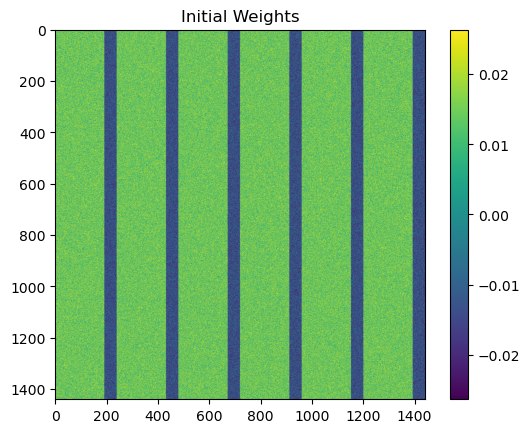

In [11]:
kk = 0
plt.imshow(weights_init[kk])
plt.colorbar()
plt.title('Initial Weights')

#### Test data pass

In [11]:
train_loader = {}

⠸ Connecting to=cpu... status=READY


In [11]:
for cntr in range(nRuns):
    train_loader[cntr] = makeTensorLoaders((stacked_train_set, stacked_test_set), batch_size, shuffle=True)

⠸ Connecting to=cpu... status=READY


In [11]:
for inputs, targets in train_loader[cntr]:
    if train_on_gpu:
        inputs, targets = inputs.float().cuda(), targets.float().cuda()
        inputs = inputs.permute(0,2,1)
        targets_f = torch.dstack((torch.squeeze(targets)[:,:,0],torch.squeeze(targets)[:,:,1],torch.squeeze(targets)[:,:,2],
                                  torch.squeeze(targets)[:,:,3],torch.squeeze(targets)[:,:,4],torch.squeeze(targets)[:,:,5],
                                  torch.squeeze(targets)[:,:,6],torch.squeeze(targets)[:,:,7],torch.squeeze(targets)[:,:,8],
                                  torch.squeeze(targets)[:,:,9],torch.squeeze(targets)[:,:,10],torch.squeeze(targets)[:,:,11],
                                  torch.squeeze(targets)[:,:,12],torch.squeeze(targets)[:,:,13],torch.squeeze(targets)[:,:,14],
                                  torch.squeeze(targets)[:,:,15],torch.squeeze(targets)[:,:,16],torch.squeeze(targets)[:,:,17]))
        model[cntr].cuda()
    else:
        inputs, targets = inputs.float(), targets.float()
        inputs = inputs.permute(0,2,1)
        targets_f = torch.dstack((torch.squeeze(targets)[:,:,0],torch.squeeze(targets)[:,:,1],torch.squeeze(targets)[:,:,2],
                                  torch.squeeze(targets)[:,:,3],torch.squeeze(targets)[:,:,4],torch.squeeze(targets)[:,:,5],
                                  torch.squeeze(targets)[:,:,6],torch.squeeze(targets)[:,:,7],torch.squeeze(targets)[:,:,8],
                                  torch.squeeze(targets)[:,:,9],torch.squeeze(targets)[:,:,10],torch.squeeze(targets)[:,:,11],
                                  torch.squeeze(targets)[:,:,12],torch.squeeze(targets)[:,:,13],torch.squeeze(targets)[:,:,14],
                                  torch.squeeze(targets)[:,:,15],torch.squeeze(targets)[:,:,16],torch.squeeze(targets)[:,:,17]))

⠸ Connecting to=cpu... status=READY


#### Training

In [11]:
n_epochs = 10 ##100

⠸ Connecting to=cpu... status=READY


In [11]:
train_losses_celltype = {}
train_losses = {}
for cntr in range(nRuns):
    train_losses[cntr] = np.zeros(n_epochs)
    for nn in range(n_cell_types):
        train_losses_celltype[cntr,nn] = np.zeros(n_epochs)

⠸ Connecting to=cpu... status=READY


In [11]:
targets_f_batch = {}
inputs_batch = {}

⠸ Connecting to=cpu... status=READY


In [11]:
for cntr in range(nRuns):
    print(f'Run: {cntr}')
    model[cntr].train()
    train_loss_min = np.Inf

    for epoch in tqdm(range(1, n_epochs+1)):

        train_loss = 0.0

        for inputs, targets in train_loader[cntr]:
            if train_on_gpu:
                inputs, targets = inputs.float().cuda(), targets.float().cuda()
                inputs = inputs.permute(0,2,1)
                targets_f = torch.dstack((torch.squeeze(targets)[:,:,0],torch.squeeze(targets)[:,:,1],torch.squeeze(targets)[:,:,2],
                                  torch.squeeze(targets)[:,:,3],torch.squeeze(targets)[:,:,4],torch.squeeze(targets)[:,:,5],
                                  torch.squeeze(targets)[:,:,6],torch.squeeze(targets)[:,:,7],torch.squeeze(targets)[:,:,8],
                                  torch.squeeze(targets)[:,:,9],torch.squeeze(targets)[:,:,10],torch.squeeze(targets)[:,:,11],
                                  torch.squeeze(targets)[:,:,12],torch.squeeze(targets)[:,:,13],torch.squeeze(targets)[:,:,14],
                                  torch.squeeze(targets)[:,:,15],torch.squeeze(targets)[:,:,16],torch.squeeze(targets)[:,:,17]))
                model[cntr].cuda()
            else:
                inputs, targets = inputs.float(), targets.float()
                inputs = inputs.permute(0,2,1)
                targets_f = torch.dstack((torch.squeeze(targets)[:,:,0],torch.squeeze(targets)[:,:,1],torch.squeeze(targets)[:,:,2],
                                  torch.squeeze(targets)[:,:,3],torch.squeeze(targets)[:,:,4],torch.squeeze(targets)[:,:,5],
                                  torch.squeeze(targets)[:,:,6],torch.squeeze(targets)[:,:,7],torch.squeeze(targets)[:,:,8],
                                  torch.squeeze(targets)[:,:,9],torch.squeeze(targets)[:,:,10],torch.squeeze(targets)[:,:,11],
                                  torch.squeeze(targets)[:,:,12],torch.squeeze(targets)[:,:,13],torch.squeeze(targets)[:,:,14],
                                  torch.squeeze(targets)[:,:,15],torch.squeeze(targets)[:,:,16],torch.squeeze(targets)[:,:,17]))

            optimizer[cntr].zero_grad()
            outputs, firing_rates = model[cntr](inputs)
            outputs = torch.squeeze(outputs)
            if train_on_gpu:
                outputs = outputs.cuda()

            loss = criterion(outputs, targets_f)
            train_loss += loss.item() #update training loss

            loss.backward()
            optimizer[cntr].step()

            ## Dale's backprop
            w = model[cntr].rnn.weight_hh_l0.detach().cpu().numpy()
            mask = generate_mask(w, index_ranges, signs)
            wm = w*mask
            # model[cntr].rnn.weight_hh_l0.data = torch.from_numpy(wm).float().cuda()
            model[cntr].rnn.weight_hh_l0.data = torch.from_numpy(wm).float()

        if train_loss< train_loss_min:

            #print('Epoch: {}, Train Loss Decreased!! ({:.6f}-->{:.6f})'.format(epoch,train_loss_min,train_loss))
            train_loss_min = train_loss
            torch.save(model[cntr].state_dict(),pp_pts[cntr]+'celltypeRNN-dale-dense-'+str(latent_scaling)+'.pt')

        for nnn in range(n_cell_types):
            train_losses_celltype[cntr,nnn][epoch-1] = criterion(outputs[:,:,nnn], targets_f[:,:,nnn])

        train_losses[cntr] = train_loss

        scheduler[cntr].step()

        targets_f_batch[cntr] = targets_f
        inputs_batch[cntr] = inputs

        if epoch%2 == 0:
            print(f'Epoch: {epoch}')
            print(f'Train loss: {train_loss}')

⠼ Connecting to=cpu... status=READY
Run: 0


⠸ Connecting to=cpu... status=READY


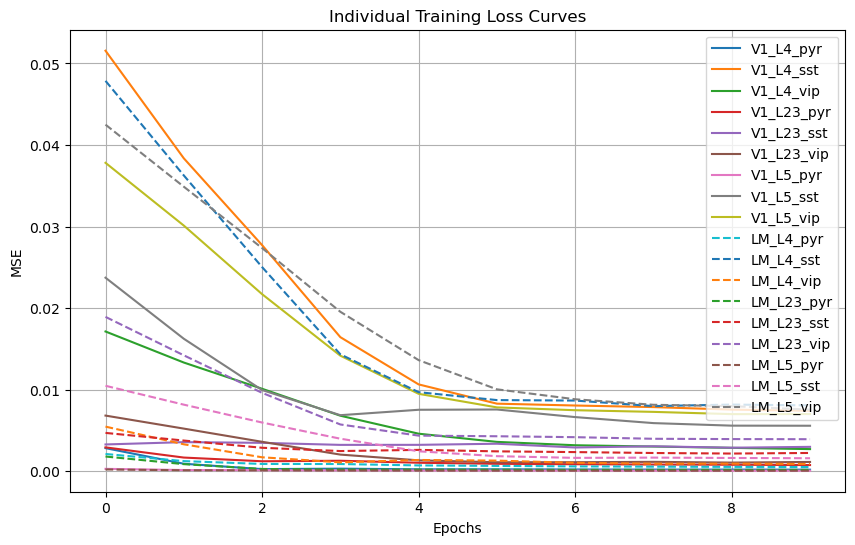

In [11]:
run = 0 # 3

# Plotting
plt.figure(figsize=(10, 6))
plt.title('Individual Training Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('MSE')

for ii in range(n_cell_types):
    if ii < np.round(n_cell_types//2):
        plt.plot(train_losses_celltype[run,ii],'-',label=label_arr[ii])
    else:
        plt.plot(train_losses_celltype[run,ii],'--',label=label_arr[ii])

plt.legend()
plt.grid(True)
plt.show()

#### Visualize traces

In [11]:
outputs_np = outputs.detach().cpu().numpy()
targets_np = targets_f.detach().cpu().numpy()

⠸ Connecting to=cpu... status=READY


⠸ Connecting to=cpu... status=READY
Text(0.5, 1.0, 'LM_L4_sst')


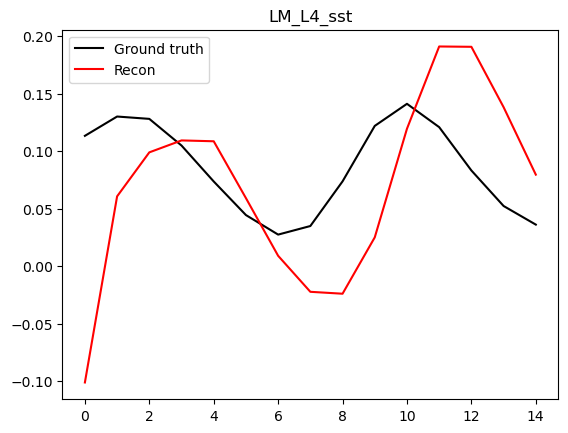

In [11]:
ex = 2
ii = 10

# target_batch = targets_np[ii*batch_size:(ii+1)*batch_size]
target_curve = targets_np[ex,:,ii]
plt.plot(target_curve,color='k',label='Ground truth')

# output_batch = outputs_np[ii*batch_size:(ii+1)*batch_size]
output_curve = outputs_np[ex,:,ii]
plt.plot(output_curve, color='r',label='Recon')
plt.legend()
plt.title(label_arr[ii])

⠸ Connecting to=cpu... status=READY


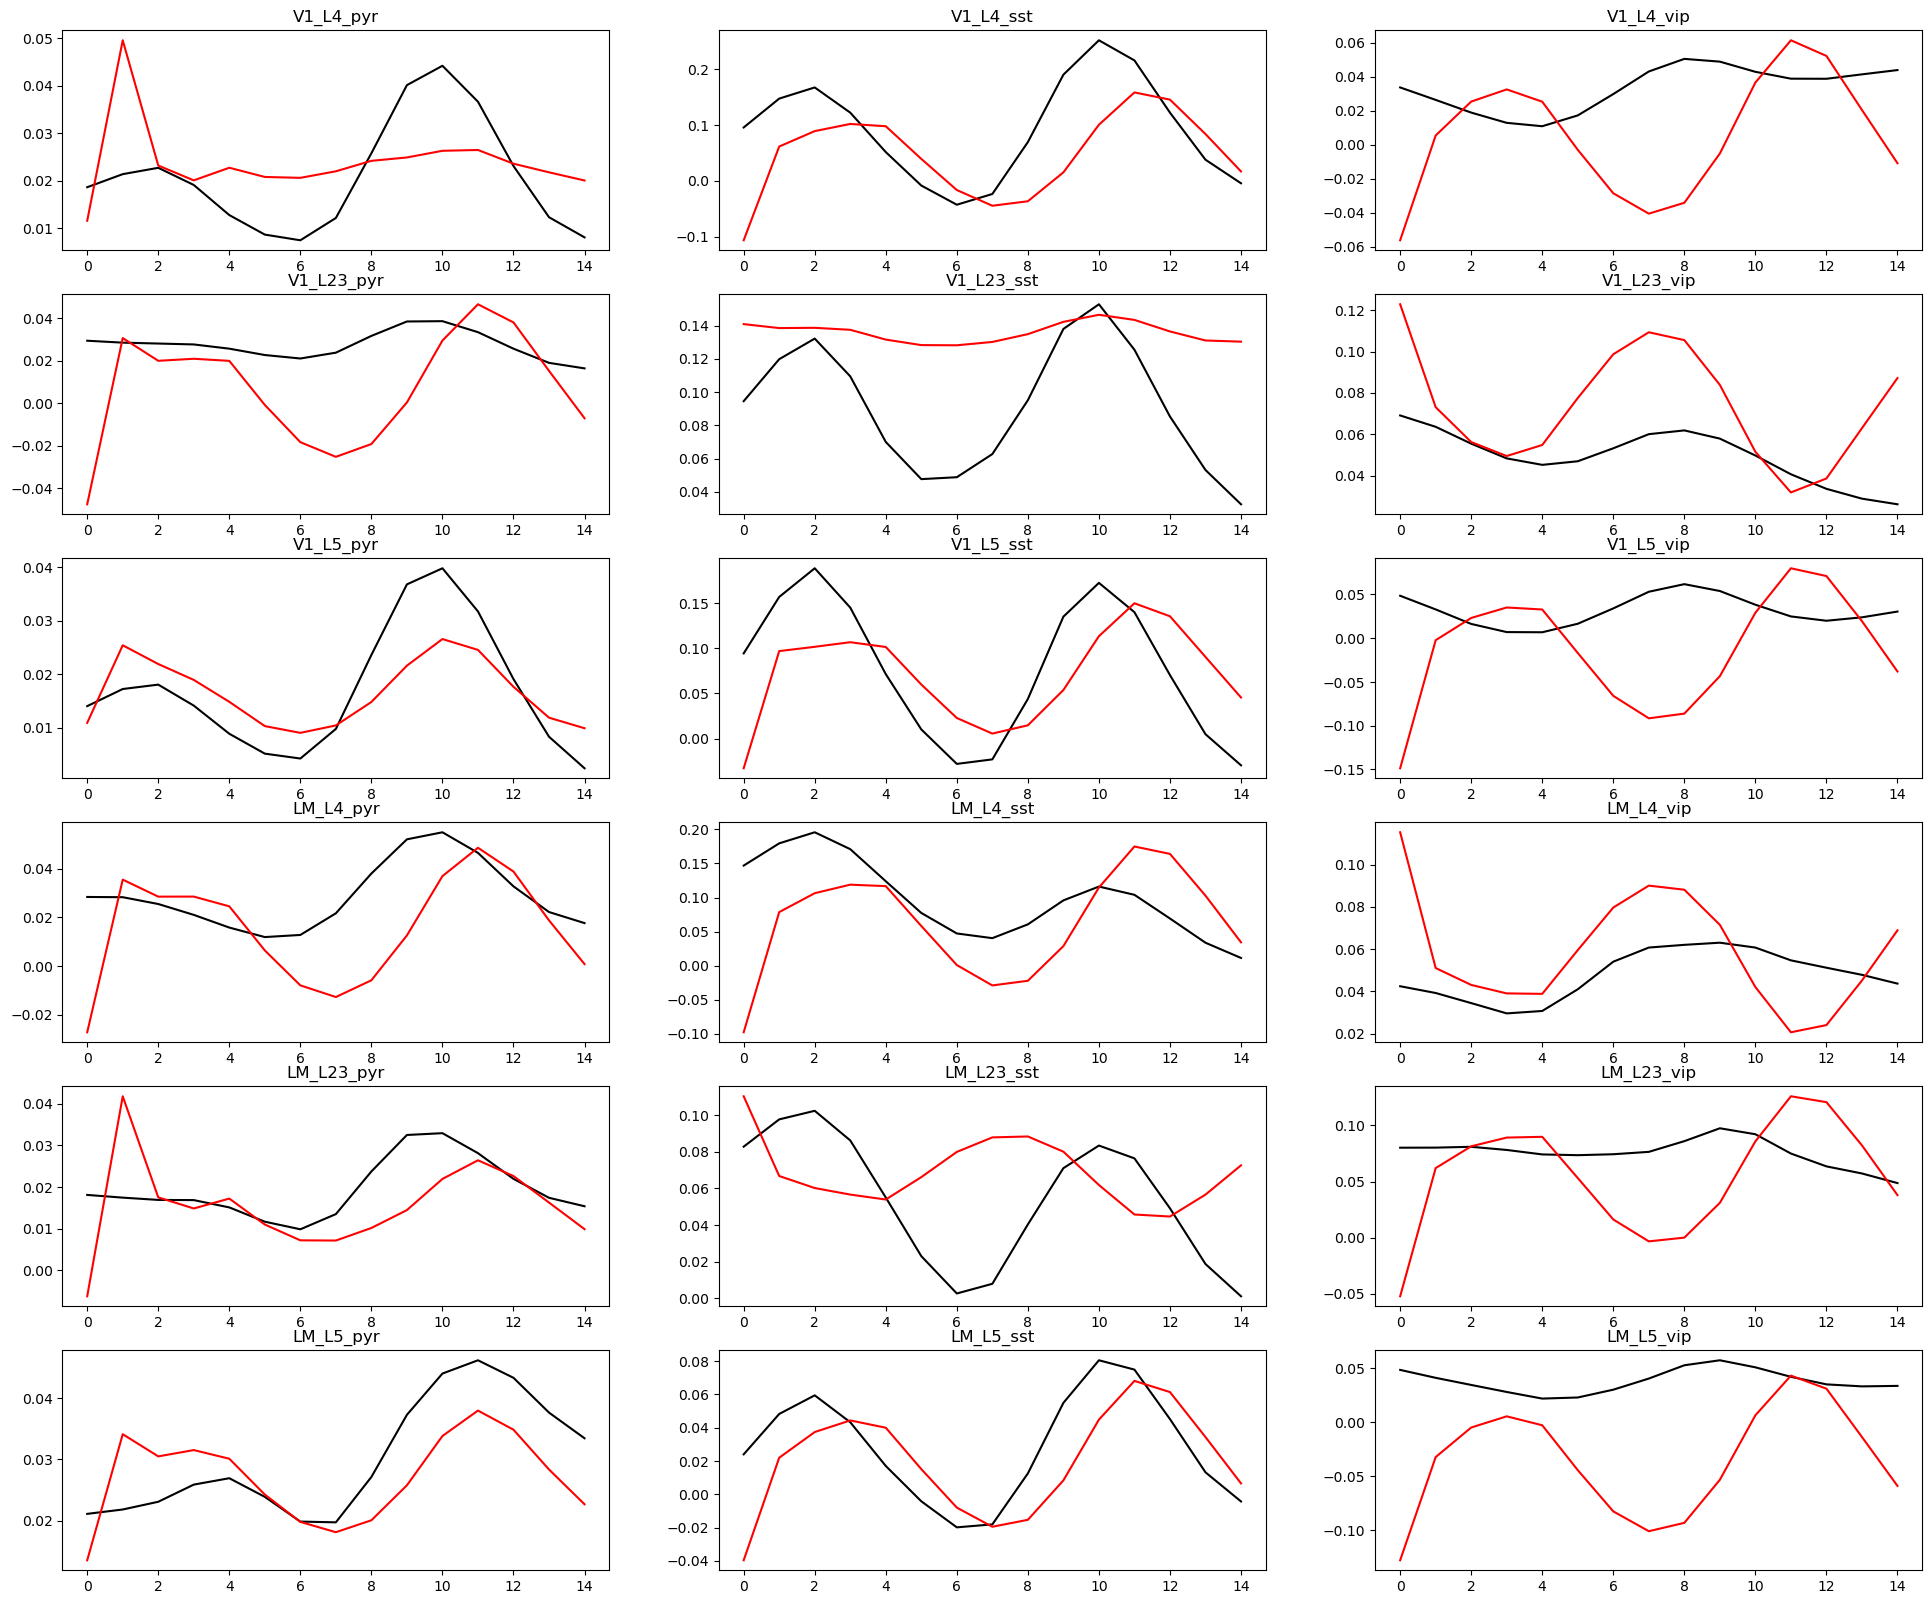

In [11]:
ex = 0

plt.figure(figsize=(24,20))

for ii in range(n_cell_types):
    plt.subplot(6,3,ii+1)

    target_curve = targets_np[ex,:,ii]
    plt.plot(target_curve,color='k')

    output_curve = outputs_np[ex,:,ii]
    plt.plot(output_curve,color='r')

    plt.title(label_arr[ii])

#### Visualize connectivity matrix

In [11]:
conn_mtx_final = {}
conn_mtx_init = {}

⠸ Connecting to=cpu... status=READY


In [11]:
for cntr in range(nRuns):
    conn_mtx_init[cntr] = weights_init[cntr]
    model[cntr].load_state_dict(torch.load(pp_pts[cntr]+'celltypeRNN-dale-dense-'+str(latent_scaling)+'.pt'))
    conn_mtx_final[cntr] = (model[cntr].rnn._parameters['weight_hh_l0'].cpu().detach().numpy())

⠸ Connecting to=cpu... status=READY


⠸ Connecting to=cpu... status=READY


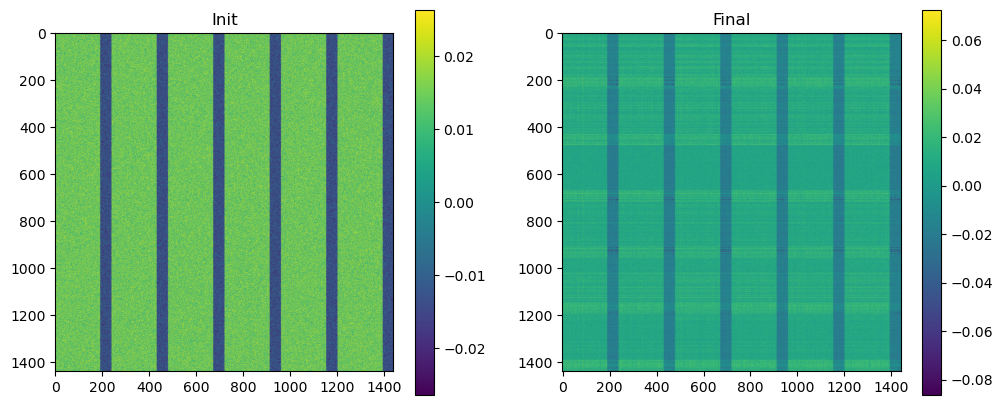

In [11]:
ff = plt.figure(figsize=(12,5))

run = 0

plt.subplot(121)
plt.imshow(conn_mtx_init[run])
plt.title("Init")
plt.colorbar()

plt.subplot(122)
plt.imshow(conn_mtx_final[run])
plt.title("Final")
plt.colorbar()

⠸ Connecting to=cpu... status=READY


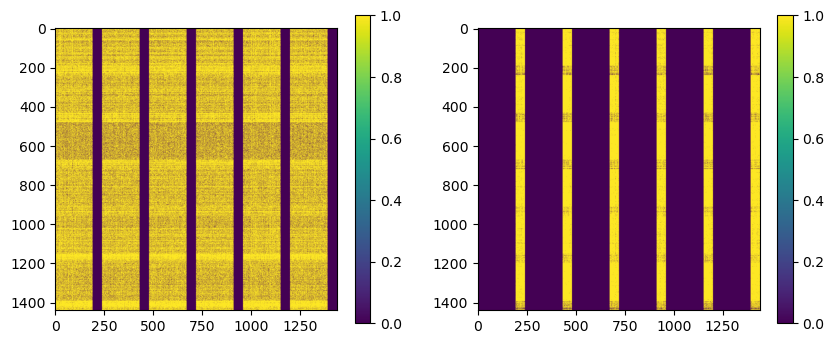

In [11]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow(conn_mtx_final[run]>0)
plt.colorbar()

plt.subplot(122)
plt.imshow(conn_mtx_final[run]<0)
plt.colorbar()

#### Average weights in blocks

In [11]:
def average_weights_in_blocks_matrix(weight_matrix, block_indices, use_absolute_values=False):
    n_blocks = len(block_indices)
    averages_matrix = np.zeros((n_blocks, n_blocks))

    for i, (start_i, end_i) in enumerate(block_indices):
        for j, (start_j, end_j) in enumerate(block_indices):
            block_weights = weight_matrix[start_i:end_i, start_j:end_j]  # Extract the block of weights ##had +1 at end_js

            if use_absolute_values:
                block_weights = np.abs(block_weights)

            block_average = np.mean(block_weights)  # Calculate the average
            averages_matrix[i, j] = block_average

    return averages_matrix

⠸ Connecting to=cpu... status=READY


In [11]:
block_indices = [(start_V1_L4_Pyr,end_V1_L4_Pyr), (start_V1_L4_SST,end_V1_L4_SST), (start_V1_L4_VIP,end_V1_L4_VIP),
                 (start_V1_L23_Pyr,end_V1_L23_Pyr), (start_V1_L23_SST,end_V1_L23_SST), (start_V1_L23_VIP,end_V1_L23_VIP),
                 (start_V1_L5_Pyr,end_V1_L5_Pyr), (start_V1_L5_SST,end_V1_L5_SST), (start_V1_L5_VIP,end_V1_L5_VIP),
                 (start_LM_L4_Pyr,end_LM_L4_Pyr), (start_LM_L4_SST,end_LM_L4_SST), (start_LM_L4_VIP,end_LM_L4_VIP),
                 (start_LM_L23_Pyr,end_LM_L23_Pyr), (start_LM_L23_SST,end_LM_L23_SST), (start_LM_L23_VIP,end_LM_L23_VIP),
                 (start_LM_L5_Pyr,end_LM_L5_Pyr), (start_LM_L5_SST,end_LM_L5_SST), (start_LM_L5_VIP,end_LM_L5_VIP)]

⠸ Connecting to=cpu... status=READY


In [11]:
block_indices_layers = [(start_V1_L4_Pyr,end_V1_L4_VIP), (start_V1_L23_Pyr,end_V1_L23_VIP), (start_V1_L5_Pyr,end_V1_L5_VIP),
                        (start_LM_L4_Pyr,end_LM_L4_VIP), (start_LM_L23_Pyr,end_LM_L23_VIP), (start_LM_L5_Pyr,end_LM_L5_VIP)]

⠸ Connecting to=cpu... status=READY


In [11]:
label_arr_layers = ['V1_L4', 'V1_L23', 'V1_L5', 'LM_L4', 'LM_L23', 'LM_L5']

⠸ Connecting to=cpu... status=READY


In [11]:
block_indices_areas = [(start_V1_L4_Pyr,end_V1_L5_VIP), (start_LM_L4_Pyr,end_LM_L5_VIP)]

⠸ Connecting to=cpu... status=READY


In [11]:
label_arr_areas = ['V1','LM']

⠸ Connecting to=cpu... status=READY


In [13]:
%copy_data source=local:connection-probs-full.csv target=cpu:connection-probs-full.csv

Copying from local:connection-probs-full.csv to cpu:connection-probs-full.csv
Pushing local:connection-probs-full.csv to remote:connection-probs-full.csv
[200] Uploaded local:connection-probs-full.csv to remote:connection-probs-full.csv


#### Read in connection probabilities

In [13]:
df = (pd.read_csv('connection-probs-full.csv',header=None))
conn_df = df[(df[1] != 'L6') & (df[2] != 'L6')]

⠸ Connecting to=cpu... status=READY


In [13]:
conn_df

⠸ Connecting to=cpu... status=READY
                          0          1           2              3  \
0    connection-probability  pre-layer  post-layer  pre-cell-type   
1                      0.06       L2/3        L2/3            Pyr   
2                       0.3       L2/3        L2/3            Pyr   
3                      0.16       L2/3        L2/3            Pyr   
4                      0.05       L2/3          L4            Pyr   
..                      ...        ...         ...            ...   
101                     0.2         L5          L4            ViP   
102                     0.0         L5          L4            ViP   
103                     0.0         L5          L5            ViP   
104                    0.05         L5          L5            ViP   
105                    0.03         L5          L5            ViP   

                  4            5             6  
0    post-cell-type  presynaptic  postsynaptic  
1               Pyr    L2/3: Pyr     

In [13]:
cell_types = ['Pyr', 'SST', 'ViP']
layers = ['L4','L2/3','L5']

⠸ Connecting to=cpu... status=READY


In [13]:
combos = []
for ii, layer in enumerate(layers):
    for jj, cell in enumerate(cell_types):
        pop = layer + ': ' + cell
        combos.append(pop)

⠸ Connecting to=cpu... status=READY


In [13]:
conn_probs = np.zeros((len(combos),len(combos)))
for col, pre_syn in enumerate(combos):
    for row, post_syn in enumerate(combos):
        conn_probs[row, col] = float(conn_df[(conn_df[5] == pre_syn) & (conn_df[6] == post_syn)].iloc[0, 0])

⠸ Connecting to=cpu... status=READY


In [13]:
sparsities = 1-conn_probs
print('Connection probs: ',conn_probs)
print('Sparsities: ',sparsities)

⠸ Connecting to=cpu... status=READY
Connection probs:  [[0.1  0.22 0.   0.05 0.04 0.   0.   0.19 0.  ]
 [0.04 0.01 0.14 0.17 0.   0.14 0.08 0.04 0.2 ]
 [0.   0.22 0.03 0.   0.13 0.05 0.02 0.14 0.  ]
 [0.07 0.33 0.   0.06 0.23 0.05 0.   0.15 0.  ]
 [0.04 0.05 0.25 0.3  0.05 0.14 0.   0.05 0.  ]
 [0.02 0.21 0.   0.16 0.3  0.01 0.   0.13 0.  ]
 [0.   0.08 0.   0.08 0.   0.   0.04 0.15 0.  ]
 [0.03 0.04 0.11 0.04 0.   0.   0.1  0.03 0.05]
 [0.11 0.07 0.04 0.   0.   0.04 0.02 0.1  0.03]]
Sparsities:  [[0.9  0.78 1.   0.95 0.96 1.   1.   0.81 1.  ]
 [0.96 0.99 0.86 0.83 1.   0.86 0.92 0.96 0.8 ]
 [1.   0.78 0.97 1.   0.87 0.95 0.98 0.86 1.  ]
 [0.93 0.67 1.   0.94 0.77 0.95 1.   0.85 1.  ]
 [0.96 0.95 0.75 0.7  0.95 0.86 1.   0.95 1.  ]
 [0.98 0.79 1.   0.84 0.7  0.99 1.   0.87 1.  ]
 [1.   0.92 1.   0.92 1.   1.   0.96 0.85 1.  ]
 [0.97 0.96 0.89 0.96 1.   1.   0.9  0.97 0.95]
 [0.89 0.93 0.96 1.   1.   0.96 0.98 0.9  0.97]]


#### Pruning

In [13]:
def topo_noise_prune(A, s):

    N_post = A.shape[0]
    N_pre = A.shape[1]
    A_sparse = np.zeros_like(A)

    z0 = np.sum(A==0) + np.min((N_pre,N_post))
    if z0 > 0:
        z = s*np.prod(A.shape)
        s = (z-z0)/(np.prod(A.shape)-z0)

    if N_post == N_pre:
        D = -1*np.diag(np.diag(A))
        W = A #+ D
    else:
        d_vals = -1*np.diag(A)
        D = np.zeros_like(A)
        np.fill_diagonal(D, d_vals)
        W = A #+ D

    K = N_pre*N_post*(1-s)/np.sum(np.abs(W))

    for ii in range(N_post):
        for jj in range(N_pre):

            if np.abs(W[ii,jj])>0:
                Pij = K*(np.abs(W[ii,jj]))
                if np.random.uniform() < Pij:
                    A_sparse[ii,jj] = A[ii,jj]

    return A_sparse, K

⠸ Connecting to=cpu... status=READY


In [13]:
def prune_in_blocks(matrix, block_indices, etas_mat):
    # Initialize the pruned matrix with zeros
    A_block_pruned = np.zeros_like(matrix)
    block_sparsities = -1*np.ones_like(etas_mat)

    # Process each block and place it into A_pruned
    for pre, (start_pre, end_pre) in enumerate(block_indices):
        for post, (start_post, end_post) in enumerate(block_indices):

            # Extract the block from the original matrix
            block = matrix[start_post:end_post, start_pre:end_pre]
            # Process the block using the prune function
            pruned_block, _ = topo_noise_prune(block, etas_mat[post,pre])
            # Place the pruned block into the pruned matrix
            A_block_pruned[start_post:end_post, start_pre:end_pre] = pruned_block

            block_sparsities[post,pre] = np.sum(pruned_block==0)/np.prod(pruned_block.shape)

    return A_block_pruned, block_sparsities

⠸ Connecting to=cpu... status=READY


In [13]:
intra_indices_V1 = []

ss = 0
for ii, layer in enumerate(layers):
    for jj, cell in enumerate(cell_types):
        ee = ss + pop_list_types[jj]*latent_scaling
        intra_indices_V1.append((ss,ee))
        ss = ee

intra_indices_V1 = np.array(intra_indices_V1)
intra_indices_LM = intra_indices_V1 + n_depths*sum(pop_list_types)*latent_scaling

⠸ Connecting to=cpu... status=READY


In [13]:
V1_block_pruned = {}
V1_block_sparsities = {}

LM_block_pruned = {}
LM_block_sparsities = {}

⠸ Connecting to=cpu... status=READY


In [13]:
# Process blocks and get the pruned intra-areal connectivity matrix
for cntr in range(nRuns):
    V1_block_pruned[cntr], V1_block_sparsities[cntr] = prune_in_blocks(conn_mtx_final[cntr], intra_indices_V1, sparsities)
    LM_block_pruned[cntr], LM_block_sparsities[cntr] = prune_in_blocks(conn_mtx_final[cntr], intra_indices_LM, sparsities)

⠸ Connecting to=cpu... status=READY


In [13]:
conn_mtx_final_pruned = {}

⠸ Connecting to=cpu... status=READY


In [13]:
for cntr in range(nRuns):
    conn_mtx_final_pruned[cntr] = conn_mtx_final[cntr].copy()
    conn_mtx_final_pruned[cntr][start_V1_L4_Pyr:end_V1_L5_VIP,
                          start_V1_L4_Pyr:end_V1_L5_VIP] = V1_block_pruned[cntr][start_V1_L4_Pyr:end_V1_L5_VIP,
                                                                            start_V1_L4_Pyr:end_V1_L5_VIP]
    conn_mtx_final_pruned[cntr][start_LM_L4_Pyr:end_LM_L5_VIP,
                          start_LM_L4_Pyr:end_LM_L5_VIP] = LM_block_pruned[cntr][start_LM_L4_Pyr:end_LM_L5_VIP,
                                                                            start_LM_L4_Pyr:end_LM_L5_VIP]

⠸ Connecting to=cpu... status=READY


In [13]:
rnn_mask = {}
for cntr in range(nRuns):
    rnn_mask[cntr] = torch.from_numpy((conn_mtx_final_pruned[cntr]!=0).astype(int)).float() #.cuda()

⠸ Connecting to=cpu... status=READY


#### Define inter-areal mask

In [13]:
p = 0.3
mask_inter_areal = {}

⠹ Connecting to=cpu... status=READY


In [13]:
for cntr in range(nRuns):
    mask_inter_areal[cntr] = np.ones((N,N))

    mask_inter_areal[cntr][start_LM_L4_Pyr:end_LM_L5_VIP, start_V1_L4_Pyr:end_V1_L5_VIP] = 0.
    mask_inter_areal[cntr][start_V1_L4_Pyr:end_V1_L5_VIP, start_LM_L4_Pyr:end_LM_L5_VIP] = 0.

    s1 = mask_inter_areal[cntr][start_LM_L4_Pyr:end_LM_L4_VIP, start_V1_L23_Pyr:end_V1_L23_Pyr].shape
    mask_inter_areal[cntr][start_LM_L4_Pyr:end_LM_L4_VIP, start_V1_L23_Pyr:end_V1_L23_Pyr] = np.random.binomial(1, p, size=s1)

    s2 = mask_inter_areal[cntr][start_V1_L23_Pyr:end_V1_L23_VIP, start_LM_L5_Pyr:end_LM_L5_Pyr].shape
    mask_inter_areal[cntr][start_V1_L23_Pyr:end_V1_L23_VIP, start_LM_L5_Pyr:end_LM_L5_Pyr] = np.random.binomial(1, p, size=s2)

    s3 = mask_inter_areal[cntr][start_V1_L5_Pyr:end_V1_L5_VIP, start_LM_L5_Pyr:end_LM_L5_Pyr].shape
    mask_inter_areal[cntr][start_V1_L5_Pyr:end_V1_L5_VIP, start_LM_L5_Pyr:end_LM_L5_Pyr] = np.random.binomial(1, p, size=s3)

⠸ Connecting to=cpu... status=READY


⠸ Connecting to=cpu... status=READY


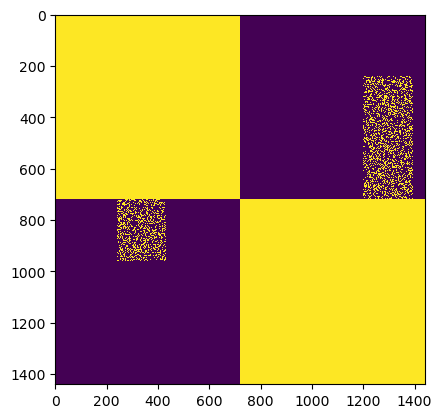

In [13]:
plt.imshow(mask_inter_areal[0], interpolation='nearest')

#### Substitute weights with single shot pruning

In [13]:
model_pruned = {}
for cntr in range(nRuns):
    model_pruned[cntr] = model[cntr]
    model_pruned[cntr] = model_pruned[cntr] #.cuda()
    # model_pruned[cntr].rnn.weight_hh_l0.data = model_pruned[cntr].rnn.weight_hh_l0.data.copy_(torch.from_numpy(conn_mtx_final_pruned[cntr]*mask_inter_areal[cntr]).float().cuda())
    model_pruned[cntr].rnn.weight_hh_l0.data = model_pruned[cntr].rnn.weight_hh_l0.data.copy_(torch.from_numpy(conn_mtx_final_pruned[cntr]*mask_inter_areal[cntr]).float())
    model_pruned[cntr] = model_pruned[cntr].float()

⠸ Connecting to=cpu... status=READY


In [13]:
mask_inter_areal_tensor = {}
for cntr in range(nRuns):
    mask_inter_areal_tensor[cntr] = torch.from_numpy(mask_inter_areal[cntr])
    if train_on_gpu:
        mask_inter_areal_tensor[cntr] = mask_inter_areal_tensor[cntr].float().cuda()

⠸ Connecting to=cpu... status=READY


In [13]:
errors = {}
for cntr in range(nRuns):
    op, frp = model_pruned[cntr](inputs_batch[cntr])
    op = torch.squeeze(op)
    # errors[cntr] = criterion(op.cuda(), targets_f_batch[cntr])
    errors[cntr] = criterion(op, targets_f_batch[cntr])

⠸ Connecting to=cpu... status=READY


In [13]:
errors

⠸ Connecting to=cpu... status=READY
{0: tensor(0.0080, grad_fn=<MseLossBackward0>)}


#### Fine-tune and retrain weights

In [13]:
finetune_optimizer = {}
finetune_scheduler = {}
for cntr in range(nRuns):
    finetune_optimizer[cntr] = optim.Adam(model_pruned[cntr].parameters(), lr=0.001)
    finetune_scheduler[cntr] = CosineAnnealingLR(finetune_optimizer[cntr], T_max=10, eta_min=0.0001)

⠸ Connecting to=cpu... status=READY


In [13]:
n_epochs_finetune = 10

⠸ Connecting to=cpu... status=READY


In [13]:
train_losses_pruned = {}
train_losses_celltype_pruned = {}

for cntr in range(nRuns):
    train_losses_pruned[cntr] = np.zeros(n_epochs_finetune)
    for nnn in range(n_cell_types):
        train_losses_celltype_pruned[cntr,nnn] = np.zeros(n_epochs_finetune)

⠸ Connecting to=cpu... status=READY


In [13]:
for cntr in range(nRuns):
    print(f'Run: {cntr}')
    model_pruned[cntr].train()
    train_loss_min = errors[cntr]

    for epoch in tqdm(range(1, n_epochs_finetune+1)):
        train_loss = 0.0
        for inputs, targets in train_loader[cntr]:
            if train_on_gpu:
                inputs, targets = inputs.float().cuda(), torch.unsqueeze(targets.float().cuda(),-1)
                inputs = inputs.permute(0,2,1)
                targets_f = torch.dstack((torch.squeeze(targets)[:,:,0],torch.squeeze(targets)[:,:,1],torch.squeeze(targets)[:,:,2],
                                  torch.squeeze(targets)[:,:,3],torch.squeeze(targets)[:,:,4],torch.squeeze(targets)[:,:,5],
                                  torch.squeeze(targets)[:,:,6],torch.squeeze(targets)[:,:,7],torch.squeeze(targets)[:,:,8],
                                  torch.squeeze(targets)[:,:,9],torch.squeeze(targets)[:,:,10],torch.squeeze(targets)[:,:,11],
                                  torch.squeeze(targets)[:,:,12],torch.squeeze(targets)[:,:,13],torch.squeeze(targets)[:,:,14],
                                  torch.squeeze(targets)[:,:,15],torch.squeeze(targets)[:,:,16],torch.squeeze(targets)[:,:,17]))
                model_pruned[cntr].cuda()
            else:
                inputs, targets = inputs.float(), torch.unsqueeze(targets.float(),-1)
                inputs = inputs.permute(0,2,1)
                targets_f = torch.dstack((torch.squeeze(targets)[:,:,0],torch.squeeze(targets)[:,:,1],torch.squeeze(targets)[:,:,2],
                                  torch.squeeze(targets)[:,:,3],torch.squeeze(targets)[:,:,4],torch.squeeze(targets)[:,:,5],
                                  torch.squeeze(targets)[:,:,6],torch.squeeze(targets)[:,:,7],torch.squeeze(targets)[:,:,8],
                                  torch.squeeze(targets)[:,:,9],torch.squeeze(targets)[:,:,10],torch.squeeze(targets)[:,:,11],
                                  torch.squeeze(targets)[:,:,12],torch.squeeze(targets)[:,:,13],torch.squeeze(targets)[:,:,14],
                                  torch.squeeze(targets)[:,:,15],torch.squeeze(targets)[:,:,16],torch.squeeze(targets)[:,:,17]))
            finetune_optimizer[cntr].zero_grad()
            # oops, frps = model_pruned[cntr](inputs)
            oops, frps = model_pruned[cntr].float()(inputs)
            oops = torch.squeeze(oops)
            if train_on_gpu:
                oops = oops.cuda()
            loss = criterion(oops, targets_f)
            loss.backward()
            finetune_optimizer[cntr].step()
            train_loss += loss.item()

            ## Dale's backprop
            w = model_pruned[cntr].rnn.weight_hh_l0.detach().cpu().numpy()
            mask = generate_mask(w, index_ranges, signs)
            wm = w*mask
            model_pruned[cntr].rnn.weight_hh_l0.data = torch.from_numpy(wm).float() #.cuda()

            ## make sure sparsity mask is applied
            model_pruned[cntr].rnn.weight_hh_l0.data = rnn_mask[cntr]*mask_inter_areal_tensor[cntr]*model_pruned[cntr].rnn.weight_hh_l0.data

        if train_loss< train_loss_min:

            #print('Epoch: {}, Train Loss Decreased!! ({:.6f}-->{:.6f})'.format(epoch,train_loss_min,train_loss))
            train_loss_min = train_loss
            torch.save(model[cntr].state_dict(),pp_pts[cntr]+'celltypeRNN-dale-sparse-'+str(latent_scaling)+'.pt')

        for nnn in range(n_cell_types):
            train_losses_celltype_pruned[cntr,nnn][epoch-1] = criterion(oops[:,:,nnn], targets_f[:,:,nnn])

        train_losses_pruned[cntr] = train_loss

        finetune_scheduler[cntr].step()

        if epoch%2 == 0:
            print(f'Epoch: {epoch}')
            print(f'Train loss: {train_loss}')

⠸ Connecting to=cpu... status=READY
Run: 0


In [13]:
oops_np = oops.detach().cpu().numpy()
targets_np = targets_f.detach().cpu().numpy()

⠸ Connecting to=cpu... status=READY


⠸ Connecting to=cpu... status=READY


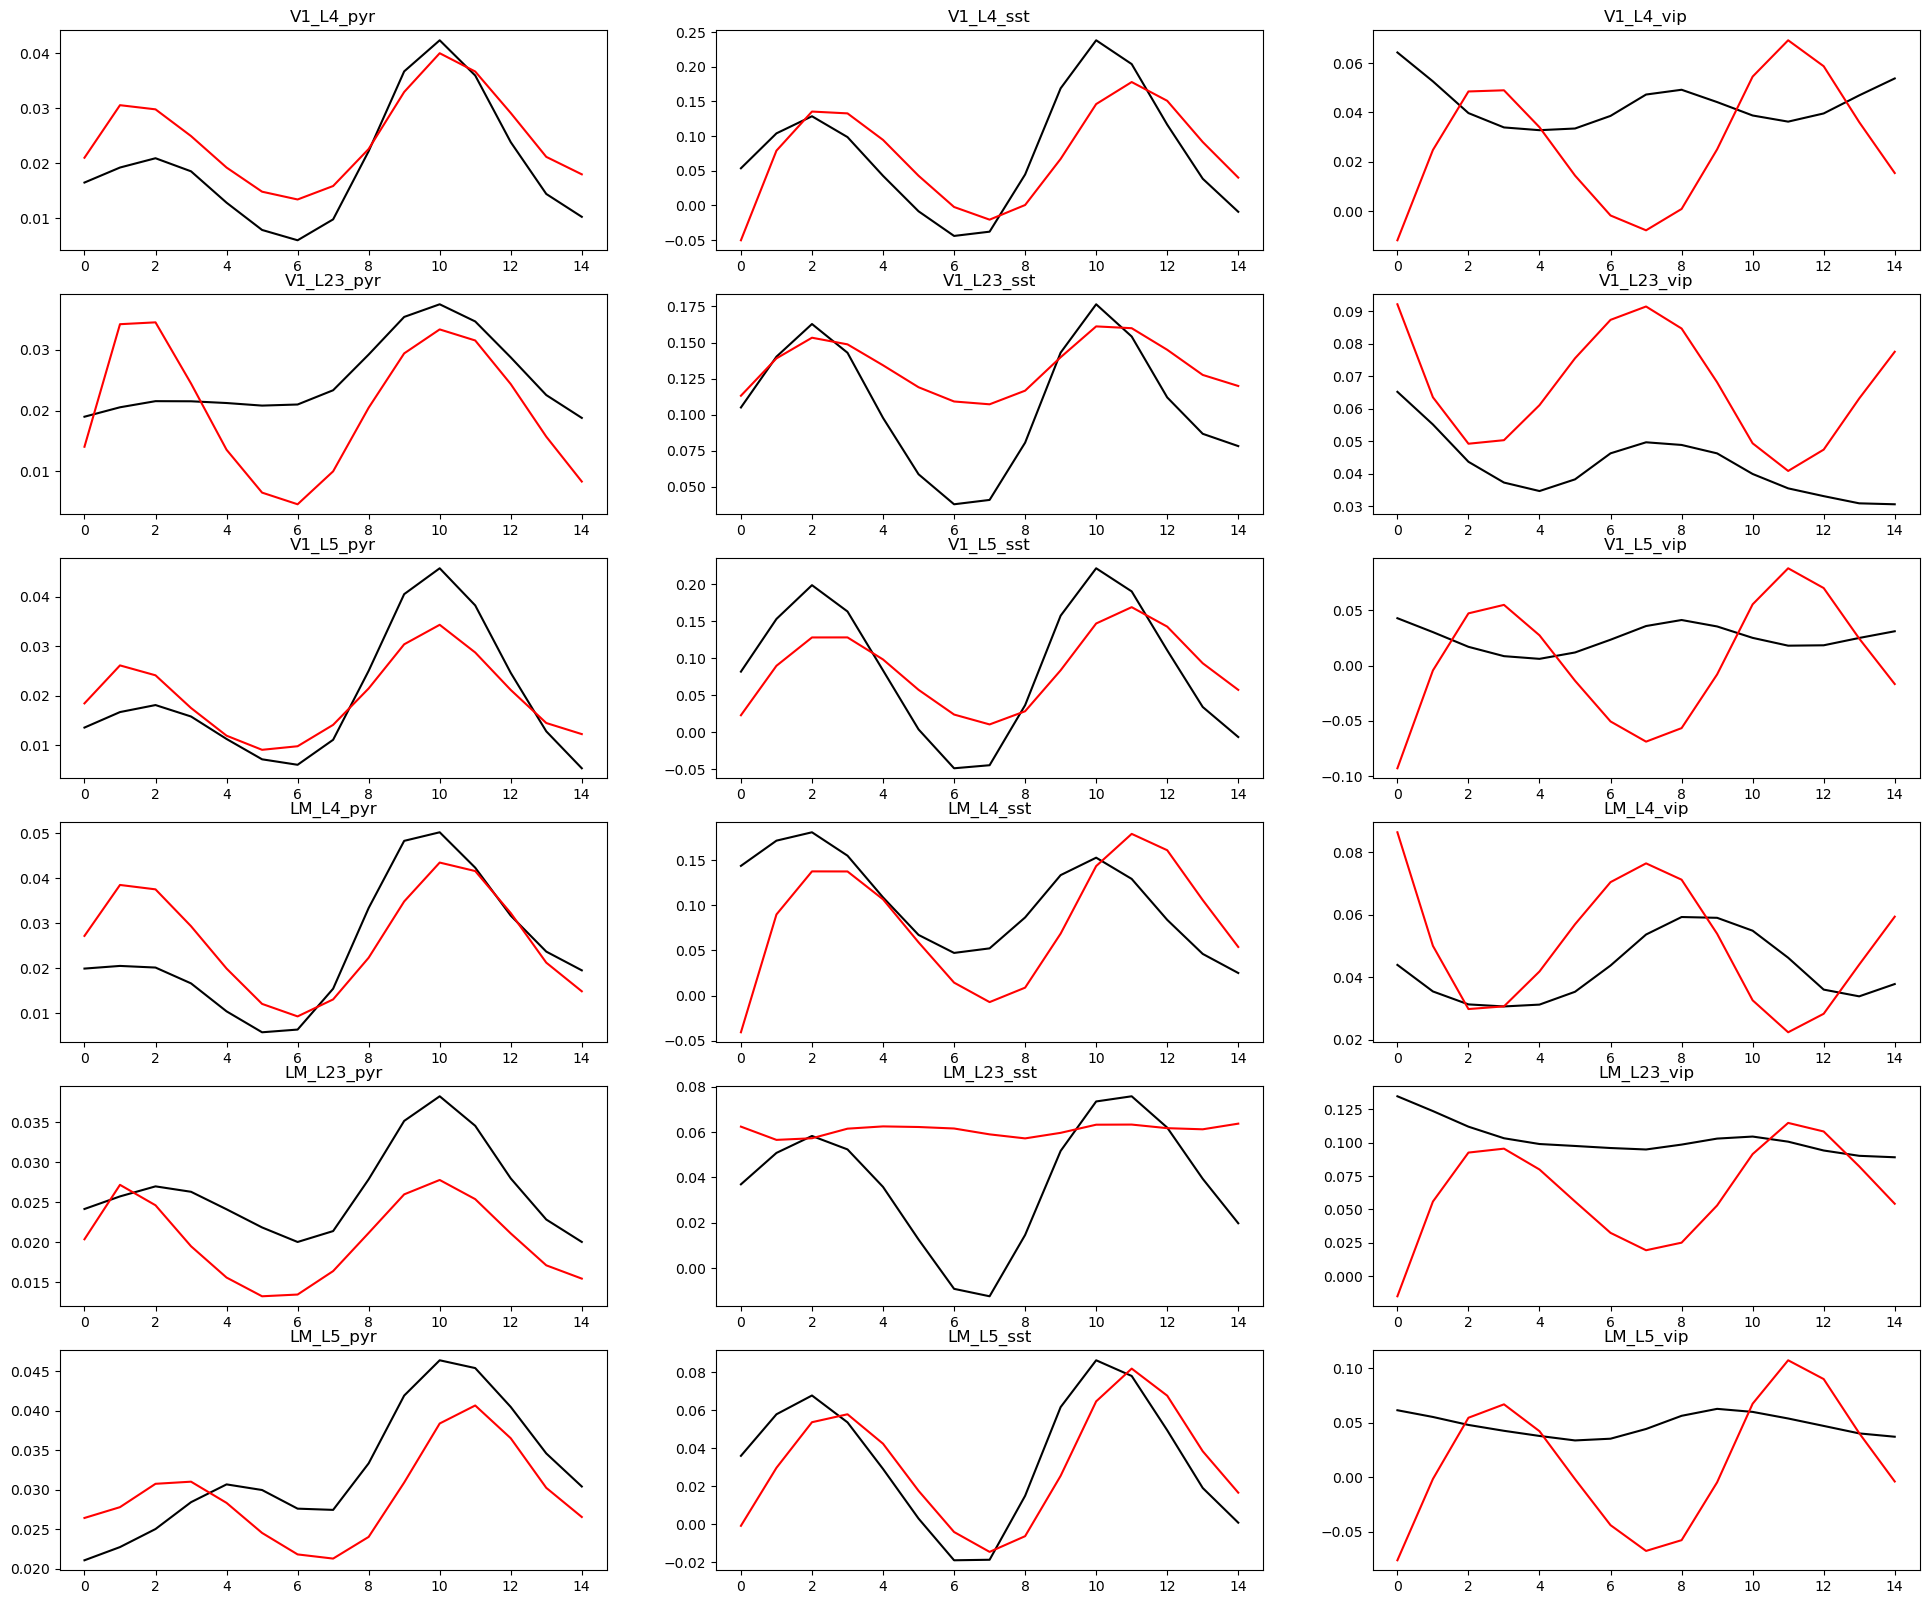

In [13]:
ex = 10

plt.figure(figsize=(24,20))

for ii in range(n_cell_types):
    plt.subplot(6,3,ii+1)

    target_curve = targets_np[ex,:,ii]
    plt.plot(target_curve,color='k')

    output_curve = oops_np[ex,:,ii]
    plt.plot(output_curve,color='r')

    plt.title(label_arr[ii])

#### Weight analysis post pruning

In [13]:
conn_mtx_final_pruned_retrained = {}
conn_mtx_pruned_init = {}

⠸ Connecting to=cpu... status=READY


In [13]:
for cntr in range(nRuns):
    conn_mtx_final_pruned_retrained[cntr] = (model_pruned[cntr].rnn._parameters['weight_hh_l0'].cpu().detach().numpy())
    conn_mtx_pruned_init[cntr] = conn_mtx_final_pruned[cntr]*mask_inter_areal[cntr]

⠸ Connecting to=cpu... status=READY


⠸ Connecting to=cpu... status=READY


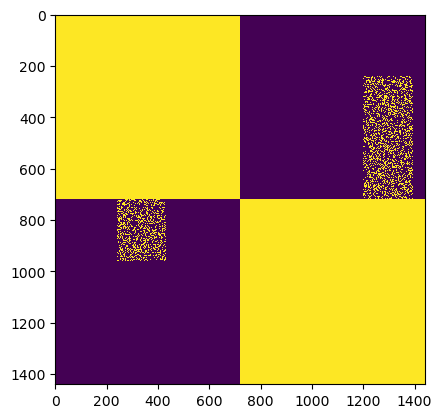

In [13]:
MM = (mask_inter_areal[run]!=0)*1
plt.imshow(MM, interpolation='nearest')

⠸ Connecting to=cpu... status=READY


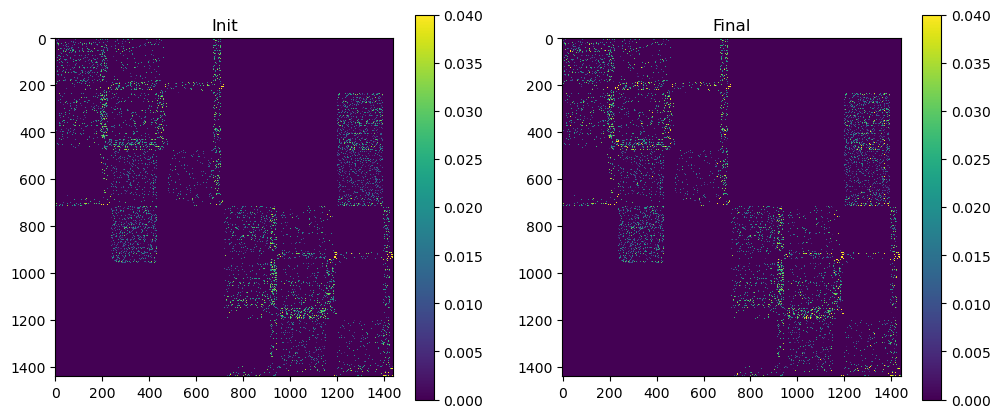

In [13]:
run = 0

ff = plt.figure(figsize=(12,5))

plt.subplot(121)
plt.imshow(np.abs(conn_mtx_pruned_init[run]),interpolation='nearest')
plt.title("Init")
plt.colorbar()
plt.clim(0.0,0.04)

plt.subplot(122)
plt.imshow(np.abs(conn_mtx_final_pruned_retrained[run]),interpolation='nearest')
plt.title("Final")
plt.colorbar()
plt.clim(0.0,0.04)

In [13]:
av_raw_init_pruned = {}
av_raw_final_pruned = {}

av_abs_init_pruned = {}
av_abs_final_pruned = {}

⠸ Connecting to=cpu... status=READY


In [13]:
for cntr in range(nRuns):
    av_raw_init_pruned[cntr] = average_weights_in_blocks_matrix(weights_init[cntr], block_indices, use_absolute_values=False)
    av_raw_final_pruned[cntr] = average_weights_in_blocks_matrix(conn_mtx_final_pruned_retrained[cntr], block_indices,
                                                           use_absolute_values=False)

    av_abs_init_pruned[cntr] = average_weights_in_blocks_matrix(weights_init[cntr], block_indices, use_absolute_values=True)
    av_abs_final_pruned[cntr] = average_weights_in_blocks_matrix(conn_mtx_final_pruned_retrained[cntr], block_indices,
                                                           use_absolute_values=True)

⠸ Connecting to=cpu... status=READY


⠸ Connecting to=cpu... status=READY


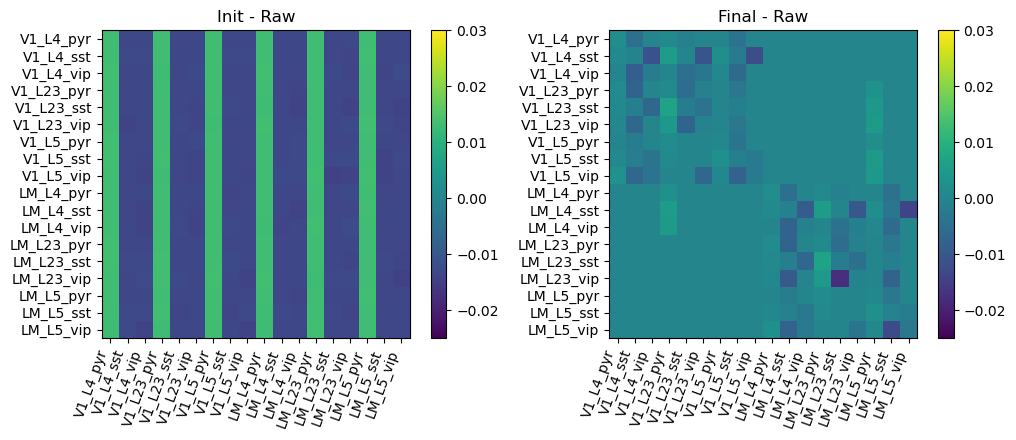

In [13]:
fraw = plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(av_raw_init_pruned[run], cmap='viridis', vmin=av_raw_init_pruned[run].min(), vmax=av_raw_init_pruned[run].max())
plt.title('Init - Raw')
plt.xticks(np.arange(len(label_arr)), label_arr, rotation=70, ha='right')
plt.yticks(np.arange(len(label_arr)), label_arr)
plt.colorbar()
plt.clim(-0.025,0.03)

plt.subplot(122)
plt.imshow(av_raw_final_pruned[run], cmap='viridis', vmin=av_raw_final_pruned[run].min(), vmax=av_raw_final_pruned[run].max())
plt.title('Final - Raw')
plt.xticks(np.arange(len(label_arr)), label_arr, rotation=70, ha='right')
plt.yticks(np.arange(len(label_arr)), label_arr)
plt.colorbar()
plt.clim(-0.025,0.03)

⠸ Connecting to=cpu... status=READY


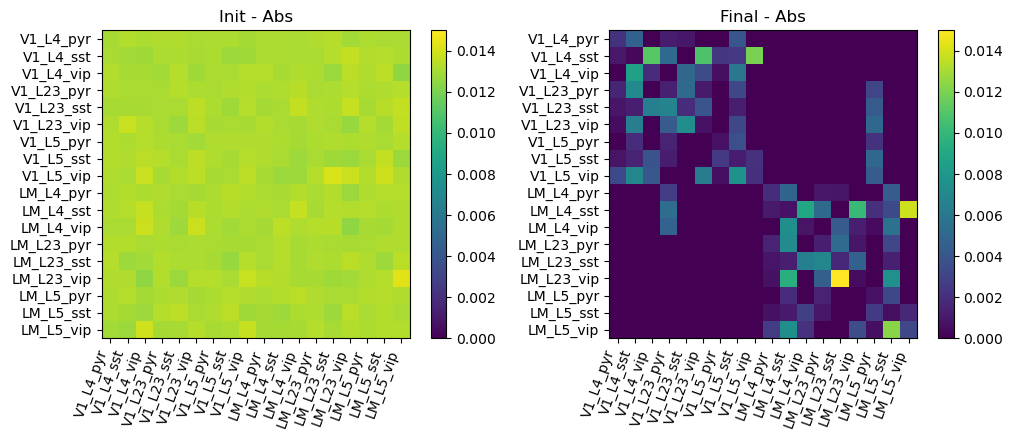

In [13]:
fabs = plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(av_abs_init_pruned[run], cmap='viridis', vmin=av_abs_init_pruned[run].min(), vmax=av_abs_init_pruned[run].max())
plt.title('Init - Abs')
plt.xticks(np.arange(len(label_arr)), label_arr, rotation=70, ha='right')
plt.yticks(np.arange(len(label_arr)), label_arr)
plt.colorbar()
plt.clim(0.0,0.015)

plt.subplot(122)
plt.imshow(av_abs_final_pruned[run], cmap='viridis', vmin=av_abs_final_pruned[run].min(), vmax=av_abs_final_pruned[run].max())
plt.title('Final - Abs')
plt.xticks(np.arange(len(label_arr)), label_arr, rotation=70, ha='right')
plt.yticks(np.arange(len(label_arr)), label_arr)
plt.colorbar()
plt.clim(0.0,0.015)

In [13]:
av_raw_init_layers_pruned = {}
av_raw_final_layers_pruned = {}

av_abs_init_layers_pruned = {}
av_abs_final_layers_pruned = {}

⠹ Connecting to=cpu... status=READY


In [13]:
for cntr in range(nRuns):
    av_raw_init_layers_pruned[cntr] = average_weights_in_blocks_matrix(weights_init[cntr], block_indices_layers, use_absolute_values=False)
    av_raw_final_layers_pruned[cntr] = average_weights_in_blocks_matrix(conn_mtx_final_pruned_retrained[cntr], block_indices_layers, use_absolute_values=False)

    av_abs_init_layers_pruned[cntr] = average_weights_in_blocks_matrix(weights_init[cntr], block_indices_layers, use_absolute_values=True)
    av_abs_final_layers_pruned[cntr] = average_weights_in_blocks_matrix(conn_mtx_final_pruned_retrained[cntr], block_indices_layers, use_absolute_values=True)

⠸ Connecting to=cpu... status=READY


⠸ Connecting to=cpu... status=READY


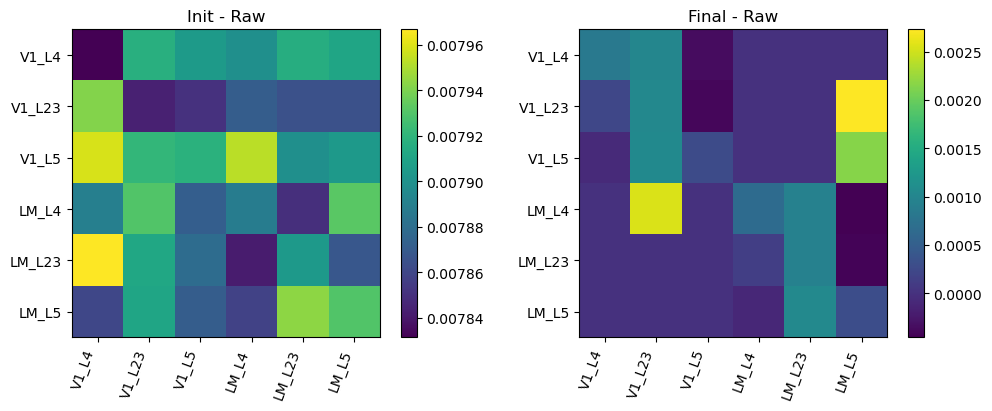

In [13]:
fraw = plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(av_raw_init_layers_pruned[run], cmap='viridis',
           vmin=av_raw_init_layers_pruned[run].min(), vmax=av_raw_init_layers_pruned[run].max(),interpolation='nearest')
plt.title('Init - Raw')
plt.xticks(np.arange(len(label_arr_layers)), label_arr_layers, rotation=70, ha='right')
plt.yticks(np.arange(len(label_arr_layers)), label_arr_layers)
plt.colorbar()
# plt.clim(0.007,0.01)

plt.subplot(122)
plt.imshow(av_raw_final_layers_pruned[run], cmap='viridis',
           vmin=av_raw_final_layers_pruned[run].min(), vmax=av_raw_final_layers_pruned[run].max(),interpolation='nearest')
plt.title('Final - Raw')
plt.xticks(np.arange(len(label_arr_layers)), label_arr_layers, rotation=70, ha='right')
plt.yticks(np.arange(len(label_arr_layers)), label_arr_layers)
plt.colorbar()
# plt.clim(0.007,0.01)

⠸ Connecting to=cpu... status=READY


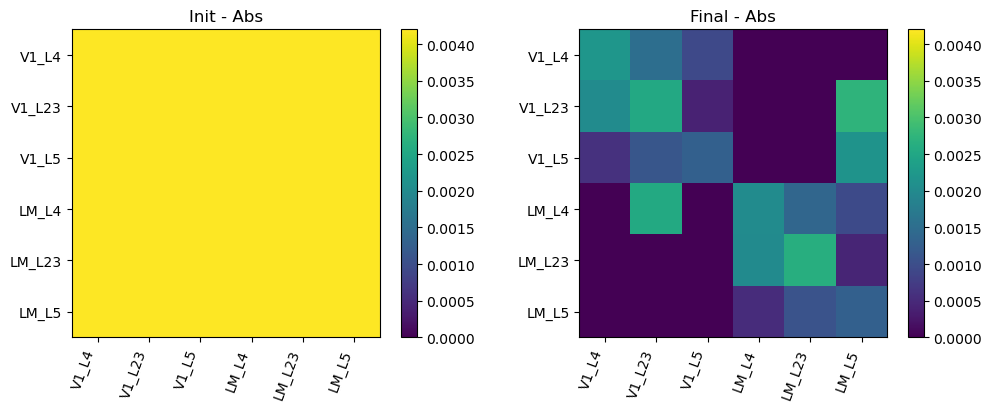

In [13]:
fabs = plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(av_abs_init_layers_pruned[run], cmap='viridis',
           vmin=av_abs_init_layers_pruned[run].min(), vmax=av_abs_init_layers_pruned[run].max(), interpolation='nearest')
plt.title('Init - Abs')
plt.xticks(np.arange(len(label_arr_layers)), label_arr_layers, rotation=70, ha='right')
plt.yticks(np.arange(len(label_arr_layers)), label_arr_layers)
plt.colorbar()
plt.clim(0.0,0.0042)

plt.subplot(122)
plt.imshow(av_abs_final_layers_pruned[run], cmap='viridis',
           vmin=av_abs_final_layers_pruned[run].min(), vmax=av_abs_final_layers_pruned[run].max(), interpolation='nearest')
plt.title('Final - Abs')
plt.xticks(np.arange(len(label_arr_layers)), label_arr_layers, rotation=70, ha='right')
plt.yticks(np.arange(len(label_arr_layers)), label_arr_layers)
plt.colorbar()
plt.clim(0.0,0.0042)

In [13]:
av_raw_init_areas_pruned = {}
av_raw_final_areas_pruned = {}

av_abs_init_areas_pruned = {}
av_abs_final_areas_pruned = {}

⠸ Connecting to=cpu... status=READY


In [13]:
for cntr in range(nRuns):
    av_raw_init_areas_pruned[cntr] = average_weights_in_blocks_matrix(weights_init[cntr], block_indices_areas, use_absolute_values=False)
    av_raw_final_areas_pruned[cntr] = average_weights_in_blocks_matrix(conn_mtx_final_pruned_retrained[cntr], block_indices_areas, use_absolute_values=False)

    av_abs_init_areas_pruned[cntr] = average_weights_in_blocks_matrix(weights_init[cntr], block_indices_areas, use_absolute_values=True)
    av_abs_final_areas_pruned[cntr] = average_weights_in_blocks_matrix(conn_mtx_final_pruned_retrained[cntr], block_indices_areas, use_absolute_values=True)

⠸ Connecting to=cpu... status=READY


⠸ Connecting to=cpu... status=READY


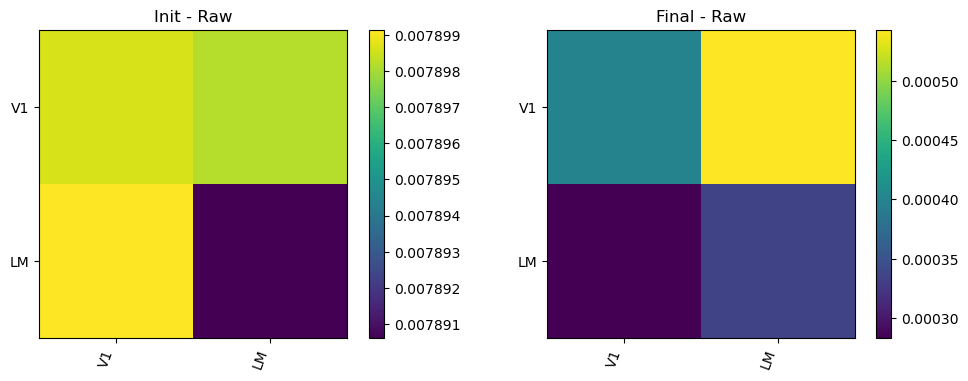

In [13]:
fraw = plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(av_raw_init_areas_pruned[run], cmap='viridis',
           vmin=av_raw_init_areas_pruned[run].min(), vmax=av_raw_init_areas_pruned[run].max(), interpolation='nearest')
plt.title('Init - Raw')
plt.xticks(np.arange(len(label_arr_areas)), label_arr_areas, rotation=70, ha='right')
plt.yticks(np.arange(len(label_arr_areas)), label_arr_areas)
plt.colorbar()
# plt.clim(0.007,0.01)

plt.subplot(122)
plt.imshow(av_raw_final_areas_pruned[run], cmap='viridis',
           vmin=av_raw_final_areas_pruned[run].min(), vmax=av_raw_final_areas_pruned[run].max(), interpolation='nearest')
plt.title('Final - Raw')
plt.xticks(np.arange(len(label_arr_areas)), label_arr_areas, rotation=70, ha='right')
plt.yticks(np.arange(len(label_arr_areas)), label_arr_areas)
plt.colorbar()
# plt.clim(0.007,0.01)

⠸ Connecting to=cpu... status=READY


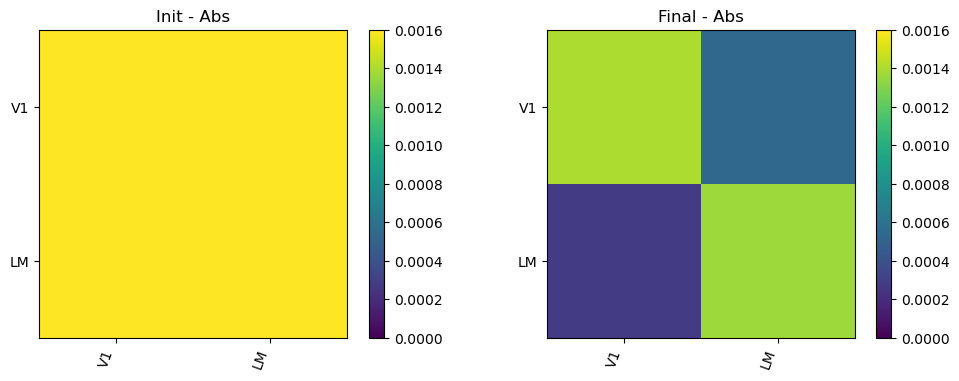

In [13]:
fabs = plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(av_abs_init_areas_pruned[run], cmap='viridis',
           vmin=av_abs_init_areas_pruned[run].min(), vmax=av_abs_init_areas_pruned[run].max(), interpolation='nearest')
plt.title('Init - Abs')
plt.xticks(np.arange(len(label_arr_areas)), label_arr_areas, rotation=70, ha='right')
plt.yticks(np.arange(len(label_arr_areas)), label_arr_areas)
plt.colorbar()
plt.clim(0.0,0.0016)

plt.subplot(122)
plt.imshow(av_abs_final_areas_pruned[run], cmap='viridis',
           vmin=av_abs_final_areas_pruned[run].min(), vmax=av_abs_final_areas_pruned[run].max(), interpolation='nearest')
plt.title('Final - Abs')
plt.xticks(np.arange(len(label_arr_areas)), label_arr_areas, rotation=70, ha='right')
plt.yticks(np.arange(len(label_arr_areas)), label_arr_areas)
plt.colorbar()
plt.clim(0.0,0.0016)

#### Scatter plot

In [13]:
def create_scatter_heat(matrix, labels):
    # Ensure the input is a square matrix
    assert matrix.shape[0] == matrix.shape[1], "The input matrix must be square"
    assert matrix.shape[0] == len(labels), "The number of labels must match the dimensions of the matrix"

    sources, targets, values = [], [], []

    # Populate sources, targets, and values based on the matrix
    for ii in range(matrix.shape[0]):
        for jj in range(matrix.shape[1]):
            sources.append(labels[jj]+'_source')
            targets.append(labels[ii]+'_target')
            values.append(matrix[ii,jj])

    # Create a DataFrame
    data = pd.DataFrame({
        'source': sources,
        'target': targets,
        'value': values
    })

    # Create the scatterplot heatmap diagram
    # Draw each cell as a scatter point with varying size and color
    g = sns.relplot(
        data=data,
        x="source", y="target", hue="value", size="value",
        palette="binary", edgecolor=".7")

    # Tweak the figure to finalize
    g.set(xlabel="", ylabel="", aspect="equal")
    g.despine(left=True, bottom=True)
    g.ax.margins(.02)
    for label in g.ax.get_xticklabels():
        label.set_rotation(90)

    return g

⠸ Connecting to=cpu... status=READY


In [13]:
av_pop = np.zeros((nRuns,) + av_abs_final_pruned[0].shape)
av_layers = np.zeros((nRuns,) + av_abs_final_layers_pruned[0].shape)
av_areas = np.zeros((nRuns,) + av_abs_final_areas_pruned[0].shape)

⠸ Connecting to=cpu... status=READY


In [13]:
for cntr in range(nRuns):
    av_pop[cntr] = av_abs_final_pruned[cntr]
    av_layers[cntr] = av_abs_final_layers_pruned[cntr]
    av_areas[cntr] = av_abs_final_areas_pruned[cntr]

⠸ Connecting to=cpu... status=READY


⠸ Connecting to=cpu... status=READY


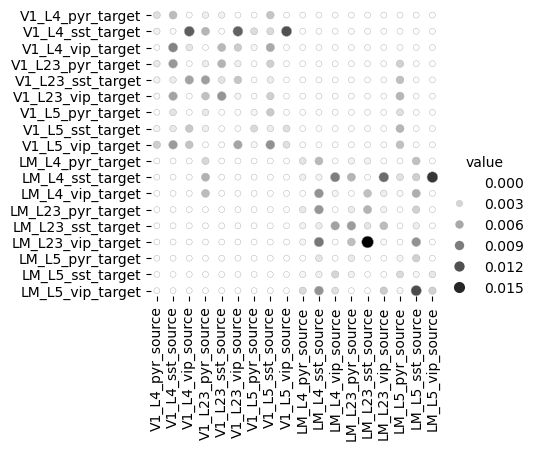

In [13]:
g_pop = create_scatter_heat(np.mean(av_pop,0), label_arr)

⠸ Connecting to=cpu... status=READY


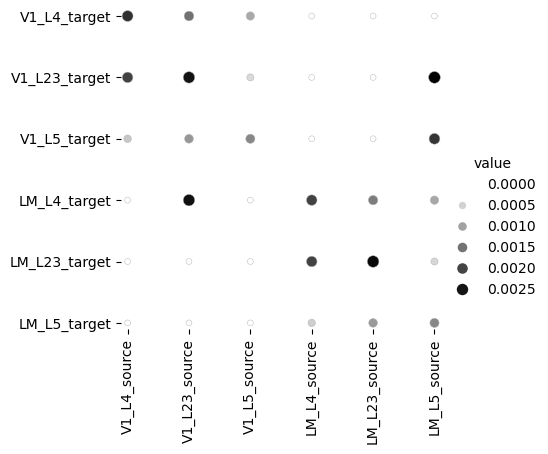

In [13]:
g_layers = create_scatter_heat(np.mean(av_layers,0), label_arr_layers)

⠸ Connecting to=cpu... status=READY


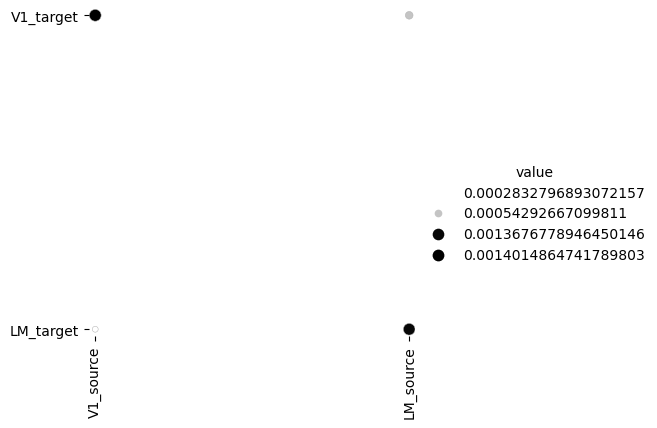

In [13]:
g_areas = create_scatter_heat(np.mean(av_areas,0), label_arr_areas)

#### With dispersion and significance